In [1]:
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
from sklearn import preprocessing

In [2]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [3]:
DAY17b = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220517_R0_20230418T125939.ict')
start_index = np.where(DAY17b["Time_Start"]==pd.to_datetime("2022-05-17 15:25:25"))
stop_index = np.where(DAY17b["Time_Start"]==pd.to_datetime("2022-05-17 15:50:00"))
    
DAY17b_subset = DAY17b[start_index[0][0]:stop_index[0][0]]
DAY17b_subset = DAY17b_subset.replace(-888888, 0)
DAY17b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
5688,2022-05-17 15:25:25,2022-05-17 15:25:26,38.280704,-71.954413,121.965,16.985,17.750,991.065,11700.80,NaN,...,NaN,0.2245,3.113,0.0,0.018560,0.0,0.0,0.4728,0.7986,0.04327
5689,2022-05-17 15:25:26,2022-05-17 15:25:27,38.279704,-71.954984,123.175,16.945,17.385,990.805,12125.60,NaN,...,NaN,0.2245,3.113,0.0,0.018560,0.0,0.0,0.4728,0.7986,0.04327
5690,2022-05-17 15:25:27,2022-05-17 15:25:28,38.278703,-71.955555,125.280,16.945,17.775,990.550,11693.00,NaN,...,NaN,0.2245,3.113,0.0,0.018560,0.0,0.0,0.4728,0.7986,0.04327
5691,2022-05-17 15:25:28,2022-05-17 15:25:29,38.277703,-71.956124,128.060,16.950,17.740,990.445,11996.40,NaN,...,NaN,0.2245,3.113,0.0,0.018560,0.0,0.0,0.4728,0.7986,0.04327
5692,2022-05-17 15:25:29,2022-05-17 15:25:30,38.276702,-71.956692,131.565,16.895,18.820,989.635,12375.40,NaN,...,NaN,0.2245,3.113,0.0,0.018560,0.0,0.0,0.4728,0.7986,0.04327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,2022-05-17 15:49:55,2022-05-17 15:49:56,37.945338,-72.136886,1494.650,10.215,17.745,842.330,5879.55,NaN,...,NaN,0.0000,0.808,0.0,0.007964,0.0,0.0,0.3004,0.1592,0.05102
7159,2022-05-17 15:49:56,2022-05-17 15:49:57,37.944332,-72.137416,1486.590,10.265,18.250,843.015,5830.90,NaN,...,NaN,0.0000,0.808,0.0,0.007964,0.0,0.0,0.3004,0.1592,0.05102
7160,2022-05-17 15:49:57,2022-05-17 15:49:58,37.943325,-72.137946,1478.490,10.365,18.420,844.325,5811.42,NaN,...,NaN,0.0000,0.808,0.0,0.007964,0.0,0.0,0.3004,0.1592,0.05102
7161,2022-05-17 15:49:58,2022-05-17 15:49:59,37.942317,-72.138476,1470.370,10.455,18.905,845.615,5895.88,NaN,...,NaN,0.0000,0.808,0.0,0.007964,0.0,0.0,0.3004,0.1592,0.05102


In [4]:
list(DAY17b_subset)

['Time_Start',
 ' Time_Stop',
 ' Latitude_THORNHILL',
 ' Longitude_THORNHILL',
 ' GPS_Altitude_THORNHILL',
 ' Static_Air_Temp_THORNHILL',
 ' IR_Surf_Temp_THORNHILL',
 ' Static_Pressure_THORNHILL',
 ' H2O_DLH_DISKIN',
 ' RHi_DLH_DISKIN',
 ' RHw_DLH_DISKIN',
 ' CH4_ppm_DISKIN',
 ' CO_ppm_DISKIN',
 ' CO2_ppm_DISKIN',
 ' O3_ppbv_DISKIN',
 ' Org_Ave_IsoK_STP_ZIEMBA',
 ' SO4_Ave_IsoK_STP_ZIEMBA',
 ' NO3_Ave_IsoK_STP_ZIEMBA',
 ' NH4_Ave_IsoK_STP_ZIEMBA',
 ' Chl_Ave_IsoK_STP_ZIEMBA',
 ' mz44_Ave_IsoK_STP_ZIEMBA',
 ' Duration_CVI_secs_ZIEMBA',
 ' Org_frac_CVI_ZIEMBA',
 ' SO4_frac_CVI_ZIEMBA',
 ' NO3_frac_CVI_ZIEMBA',
 ' NH4_frac_CVI_ZIEMBA',
 ' Chl_frac_CVI_ZIEMBA',
 ' mz42_ORGfrac_CVI_ZIEMBA',
 ' mz44_ORGfrac_CVI_ZIEMBA',
 ' Sodium',
 ' Ammonium',
 ' DMA',
 ' Potassium',
 ' Magnesium',
 ' Calcium',
 ' Glycolate',
 ' Acetate',
 ' Formate',
 ' MSA',
 ' Pyruvate',
 ' Glyoxylate',
 ' Chloride',
 ' Nitrite',
 ' Bromide',
 ' Nitrate',
 ' Glutarate',
 ' Adipate',
 ' Succinate',
 ' Maleate',
 ' Sulfat

In [5]:
Day_17b = DAY17b_subset.resample('5T', on='Time_Start').median()
Day_17b

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-05-17 15:25:00,2022-05-17 15:27:43.000,38.263202,-71.918114,457.680,15.4100,18.725,952.3100,10281.200,NaN,55.90,...,NaN,0.01506,2.707,0.000000,0.019060,0.0,0.0,0.53320,0.64240,0.03904
2022-05-17 15:30:00,2022-05-17 15:32:30.500,38.264605,-71.936495,1313.790,10.4325,18.010,859.9475,7886.370,NaN,49.30,...,NaN,0.00000,2.688,0.000000,0.021870,0.0,0.0,0.88300,0.46880,0.04473
2022-05-17 15:35:00,2022-05-17 15:37:30.500,38.297391,-71.958684,2172.765,5.3575,17.120,774.3175,4582.380,NaN,38.45,...,NaN,0.00000,3.208,0.000000,0.013180,0.0,0.0,0.29990,0.07427,0.04610
2022-05-17 15:40:00,2022-05-17 15:42:30.500,38.263492,-71.927768,3175.805,4.2600,17.325,684.4375,504.720,NaN,4.55,...,NaN,0.00000,3.398,0.008974,0.015740,0.0,0.0,0.05381,0.00000,0.04072
2022-05-17 15:45:00,2022-05-17 15:47:30.500,38.092312,-72.054979,2633.705,5.2675,18.620,732.9400,969.595,NaN,7.70,...,NaN,0.00000,0.808,0.000000,0.007964,0.0,0.0,0.30040,0.15920,0.05102


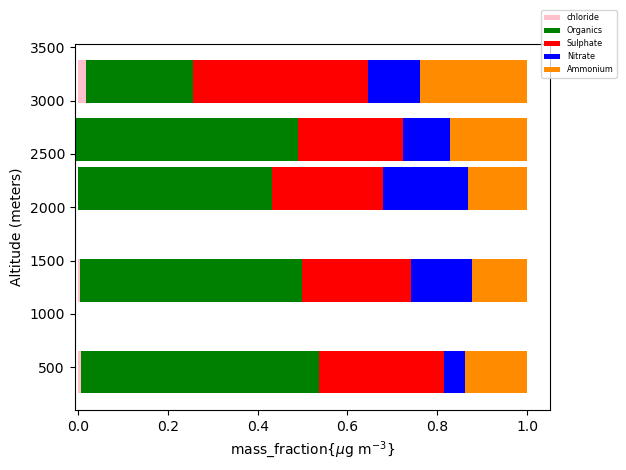

In [6]:
normal = (Day_17b[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_17b[' Org_Ave_IsoK_STP_ZIEMBA']+Day_17b[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_17b[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_17b[' NH4_Ave_IsoK_STP_ZIEMBA'])
y1 = Day_17b[' Chl_Ave_IsoK_STP_ZIEMBA']/normal
y2 = Day_17b[' Org_Ave_IsoK_STP_ZIEMBA']/normal
y3 = Day_17b[' SO4_Ave_IsoK_STP_ZIEMBA']/normal
y4 = Day_17b[' NO3_Ave_IsoK_STP_ZIEMBA']/normal
y5 = Day_17b[' NH4_Ave_IsoK_STP_ZIEMBA']/normal
y6 = Day_17b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal
fig,ax = plt.subplots()
#figsize=(7,3)
ax.barh(Day_17b[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "pink", label = 'chloride')
ax.barh(Day_17b[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "green", label = 'Organics')
ax.barh(Day_17b[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax.barh(Day_17b[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "blue", label = 'Nitrate')
ax.barh(Day_17b[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "darkorange", label = 'Ammonium')
ax.set_ylabel('Altitude (meters)')
ax.set_xlabel('mass_fraction{$\mu$g m$^{-3}$}')

ax.legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [7]:
DAY2 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220602_R0_L1_20230418T125941.ict')
start_index = np.where(DAY2["Time_Start"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"]==pd.to_datetime("2022-06-02 14:10:00"))
    
DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]
DAY2_subset = DAY2_subset.replace(-888888, 0)
DAY2_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
8926,2022-06-02 13:48:00,2022-06-02 13:48:01,32.397719,-65.920473,1896.68,12.265,22.880,806.650,10577.00,NaN,...,NaN,0.20010,4.112,0.0,0.05365,0.13890,0.12270,0.51380,0.6617,0.01338
8927,2022-06-02 13:48:01,2022-06-02 13:48:02,32.397400,-65.918900,1897.28,12.245,22.530,806.615,10629.20,NaN,...,NaN,0.20010,4.112,0.0,0.05365,0.13890,0.12270,0.51380,0.6617,0.01338
8928,2022-06-02 13:48:02,2022-06-02 13:48:03,32.397079,-65.917327,1898.01,12.225,21.145,806.525,10689.70,NaN,...,NaN,0.20010,4.112,0.0,0.05365,0.13890,0.12270,0.51380,0.6617,0.01338
8929,2022-06-02 13:48:03,2022-06-02 13:48:04,32.396758,-65.915754,1898.83,12.215,22.480,806.410,10748.20,NaN,...,NaN,0.20010,4.112,0.0,0.05365,0.13890,0.12270,0.51380,0.6617,0.01338
8930,2022-06-02 13:48:04,2022-06-02 13:48:05,32.396435,-65.914182,1899.75,12.200,23.810,806.305,10752.00,NaN,...,NaN,0.20010,4.112,0.0,0.05365,0.13890,0.12270,0.51380,0.6617,0.01338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241,2022-06-02 14:09:55,2022-06-02 14:09:56,32.272869,-64.969777,2855.32,9.315,23.305,719.965,2491.56,NaN,...,NaN,0.04646,5.460,0.0,0.03423,0.03038,0.04495,0.08881,0.0000,0.01360
10242,2022-06-02 14:09:56,2022-06-02 14:09:57,32.273564,-64.970808,2861.28,9.295,22.065,719.475,2397.14,NaN,...,NaN,0.04646,5.460,0.0,0.03423,0.03038,0.04495,0.08881,0.0000,0.01360
10243,2022-06-02 14:09:57,2022-06-02 14:09:58,32.274234,-64.971861,2867.15,9.260,21.570,718.840,2331.74,NaN,...,NaN,0.04646,5.460,0.0,0.03423,0.03038,0.04495,0.08881,0.0000,0.01360
10244,2022-06-02 14:09:58,2022-06-02 14:09:59,32.274877,-64.972937,2872.99,9.225,22.130,718.225,2289.79,NaN,...,NaN,0.04646,5.460,0.0,0.03423,0.03038,0.04495,0.08881,0.0000,0.01360


In [8]:
data_des = DAY2_subset.describe()
data_des

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
count,1320,1320,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1319.000000,0.0,...,0.0,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,2022-06-02 13:58:59.500000,2022-06-02 13:59:00.500000,32.274393,-65.209501,1205.568970,16.918989,22.852458,880.086083,16083.661039,NaN,...,NaN,0.889725,4.560285,0.061895,0.076329,0.119829,0.759534,0.835090,1.266239,0.010084
min,2022-06-02 13:48:00,2022-06-02 13:48:01,32.195824,-65.920473,106.280000,9.205000,18.235000,717.670000,2136.490000,NaN,...,NaN,0.046460,3.629000,0.000000,0.034230,0.030380,0.044950,0.088810,0.000000,0.005164
25%,2022-06-02 13:53:29.750000128,2022-06-02 13:53:30.750000128,32.234574,-65.406741,447.575000,12.780000,21.928750,806.641250,10793.900000,NaN,...,NaN,0.200100,4.112000,0.000000,0.053650,0.042580,0.122700,0.513800,0.661700,0.009142
50%,2022-06-02 13:58:59.500000,2022-06-02 13:59:00.500000,32.267367,-65.037610,1139.915000,17.062500,22.860000,883.775000,15828.600000,NaN,...,NaN,0.527500,4.645000,0.006013,0.065080,0.138900,0.460200,0.912500,1.183000,0.011540
75%,2022-06-02 14:04:29.249999872,2022-06-02 14:04:30.249999872,32.299063,-64.990606,1897.905000,21.016250,23.815000,957.973750,22582.700000,NaN,...,NaN,0.871900,5.395000,0.041650,0.067750,0.153000,1.035000,1.010000,1.737000,0.013380
max,2022-06-02 14:09:59,2022-06-02 14:10:00,32.397719,-64.948071,2878.900000,23.945000,26.420000,997.325000,24855.100000,NaN,...,NaN,2.239000,5.460000,0.218900,0.134400,0.187100,1.650000,1.191000,1.962000,0.013600
std,NaN,NaN,0.049691,0.289335,806.823586,4.474141,1.257557,82.676501,6641.505942,NaN,...,NaN,0.788851,0.699162,0.087820,0.033405,0.059927,0.597229,0.340621,0.635688,0.003127


In [9]:
data_des.loc[:,' Org_Ave_IsoK_STP_ZIEMBA':' Chl_Ave_IsoK_STP_ZIEMBA']

,Org_Ave_IsoK_STP_ZIEMBA,SO4_Ave_IsoK_STP_ZIEMBA,NO3_Ave_IsoK_STP_ZIEMBA,NH4_Ave_IsoK_STP_ZIEMBA,Chl_Ave_IsoK_STP_ZIEMBA
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,0.338282,1.002836,0.021980,0.367248,0.009284
min,-0.186000,0.187000,-0.099000,-0.109000,-0.045000
25%,0.159250,0.536000,-0.001000,0.233500,-0.008000
50%,0.332000,0.974500,0.021000,0.384000,0.006500
75%,0.515500,1.483000,0.058000,0.488000,0.027000
max,0.926000,1.665000,0.144000,0.791000,0.086000
std,0.252839,0.490116,0.050992,0.199159,0.026370


In [10]:
Day_2 = DAY2_subset.resample('5.75T', on='Time_Start').median()
Day_2

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-02 13:48:00,2022-06-02 13:50:53,32.341985,-65.646682,1711.60,13.210,22.530,825.655,12490.20,NaN,68.1,...,NaN,0.2001,4.112,0.000000,0.05365,0.13890,0.1227,0.5138,0.6617,0.013380
2022-06-02 13:53:45,2022-06-02 13:56:38,32.245500,-65.153749,320.61,22.080,24.050,972.395,23205.70,NaN,84.7,...,NaN,0.8719,3.629,0.041650,0.06508,0.18710,1.0350,1.0100,1.7370,0.005164
2022-06-02 13:59:30,2022-06-02 14:02:23,32.257186,-65.001500,1009.87,17.610,23.105,896.970,18304.10,NaN,78.7,...,NaN,2.2390,5.395,0.218900,0.13440,0.15300,1.6500,1.1910,1.9620,0.011540
2022-06-02 14:05:15,2022-06-02 14:07:38,32.246302,-64.985669,2310.35,11.245,21.600,768.575,7496.77,NaN,43.3,...,NaN,0.5275,4.645,0.006013,0.06775,0.04258,0.4602,0.9125,1.1830,0.009142


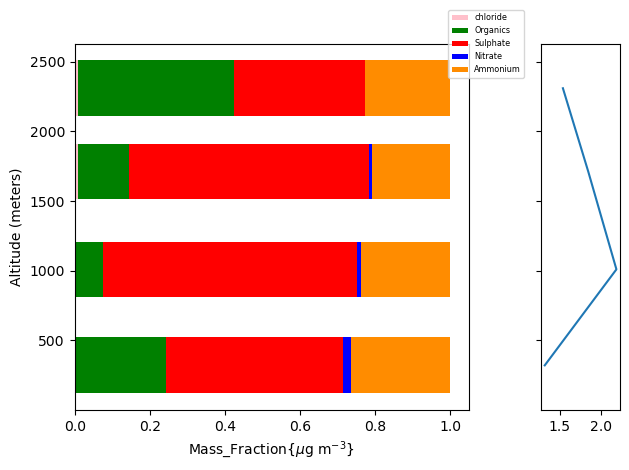

In [11]:
normal2 = (Day_2[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_2[' Org_Ave_IsoK_STP_ZIEMBA']+Day_2[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_2[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_2[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_2['AMS'] = normal2
Day_2 = Day_2.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_2[' Chl_Ave_IsoK_STP_ZIEMBA']/normal2
y2 = Day_2[' Org_Ave_IsoK_STP_ZIEMBA']/normal2
y3 = Day_2[' SO4_Ave_IsoK_STP_ZIEMBA']/normal2
y4 = Day_2[' NO3_Ave_IsoK_STP_ZIEMBA']/normal2
y5 = Day_2[' NH4_Ave_IsoK_STP_ZIEMBA']/normal2
y6 = Day_2[' mz44_Ave_IsoK_STP_ZIEMBA']/normal2
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
#figsize=(7,3)
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "pink", label = 'chloride')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_2[' GPS_Altitude_THORNHILL'], y6, left = y1, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "darkorange", label = 'Ammonium')
ax[1].plot(normal2, Day_2[' GPS_Altitude_THORNHILL'], label = 'Total_mass')
ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction{$\mu$g m$^{-3}$}')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

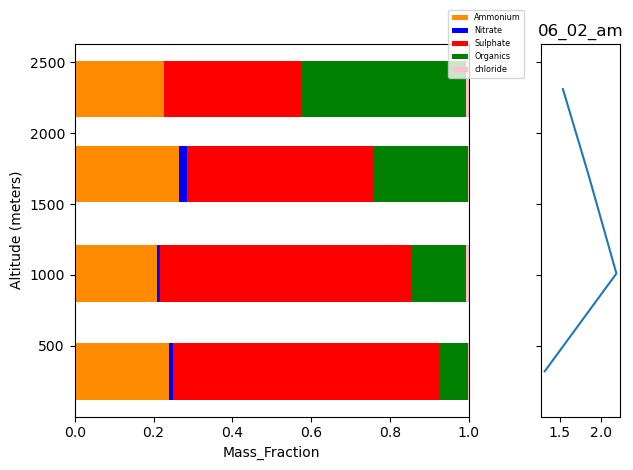

In [65]:
normal = (Day_2[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_2[' Org_Ave_IsoK_STP_ZIEMBA']+Day_2[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_2[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_2[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_2['AMS'] = normal2
Day_2 = Day_2.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_2[' NH4_Ave_IsoK_STP_ZIEMBA']/normal
y2 = Day_2[' NO3_Ave_IsoK_STP_ZIEMBA']/normal
y3 = Day_2[' SO4_Ave_IsoK_STP_ZIEMBA']/normal
y4 = Day_2[' Org_Ave_IsoK_STP_ZIEMBA']/normal
y5 = Day_2[' Chl_Ave_IsoK_STP_ZIEMBA']/normal
y6 = Day_2[' mz44_Ave_IsoK_STP_ZIEMBA']/normal
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
#figsize=(7,3)
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_2[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_2[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal2, Day_2[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_02_am')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [13]:
DAY2b = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220602_R0_L2_20230418T125941.ict')
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]
DAY2b_subset = DAY2b_subset.replace(-888888, 0)
DAY2b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
9180,2022-06-02 18:36:00,2022-06-02 18:36:01,32.312301,-65.009805,191.225,23.290,23.625,986.105,23924.90,NaN,...,NaN,0.7893,3.135,0.04381,0.07494,0.03322,0.002689,0.1805,0.222,0.01675
9181,2022-06-02 18:36:01,2022-06-02 18:36:02,32.312336,-65.010962,193.480,23.280,25.595,985.870,24157.10,NaN,...,NaN,0.7893,3.135,0.04381,0.07494,0.03322,0.002689,0.1805,0.222,0.01675
9182,2022-06-02 18:36:02,2022-06-02 18:36:03,32.312332,-65.012116,195.600,23.265,26.045,985.670,24284.40,NaN,...,NaN,0.7893,3.135,0.04381,0.07494,0.03322,0.002689,0.1805,0.222,0.01675
9183,2022-06-02 18:36:03,2022-06-02 18:36:04,32.312294,-65.013268,197.010,23.245,25.150,985.485,24487.90,NaN,...,NaN,0.7893,3.135,0.04381,0.07494,0.03322,0.002689,0.1805,0.222,0.01675
9184,2022-06-02 18:36:04,2022-06-02 18:36:05,32.312221,-65.014415,197.440,23.215,25.145,985.315,24542.80,NaN,...,NaN,0.7893,3.135,0.04381,0.07494,0.03322,0.002689,0.1805,0.222,0.01675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,2022-06-02 18:52:55,2022-06-02 18:52:56,32.205808,-64.977280,3678.610,4.190,21.740,651.395,4352.94,NaN,...,NaN,0.0000,5.010,0.00000,0.01421,0.00000,0.000000,0.0000,0.000,0.01402
10196,2022-06-02 18:52:56,2022-06-02 18:52:57,32.205215,-64.976028,3684.900,4.180,20.825,650.880,3523.91,NaN,...,NaN,0.0000,5.010,0.00000,0.01421,0.00000,0.000000,0.0000,0.000,0.01402
10197,2022-06-02 18:52:57,2022-06-02 18:52:58,32.204648,-64.974760,3691.340,4.220,20.455,650.300,3263.07,NaN,...,NaN,0.0000,5.010,0.00000,0.01421,0.00000,0.000000,0.0000,0.000,0.01402
10198,2022-06-02 18:52:58,2022-06-02 18:52:59,32.204104,-64.973478,3697.790,4.295,21.050,649.820,3090.55,NaN,...,NaN,0.0000,5.010,0.00000,0.01421,0.00000,0.000000,0.0000,0.000,0.01402


In [14]:
Day_2b = DAY2b_subset.resample('3T', on='Time_Start').median()
Day_2b

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-02 18:36:00,2022-06-02 18:37:30.500,32.267369,-65.015560,306.845,22.5775,24.2625,973.0850,21972.000,NaN,79.20,...,NaN,0.78930,3.135,0.04381,0.07494,0.03322,0.002689,0.18050,0.222000,0.01675
2022-06-02 18:39:00,2022-06-02 18:40:30.500,32.270805,-64.991538,821.045,19.4000,23.9000,917.4775,17688.350,NaN,72.35,...,NaN,0.78930,3.135,0.04381,0.07494,0.03322,0.002689,0.18050,0.222000,0.01675
2022-06-02 18:42:00,2022-06-02 18:43:30.500,32.272571,-64.973462,1438.775,15.9900,23.3750,852.8700,13362.500,NaN,63.50,...,NaN,0.61730,4.635,0.03810,0.06760,0.07264,0.331200,0.53780,1.142000,0.01088
2022-06-02 18:45:00,2022-06-02 18:46:30.500,32.322339,-65.004257,2074.180,13.6450,22.4775,791.0125,6509.550,NaN,32.70,...,NaN,0.04006,5.488,0.00000,0.02342,0.00000,0.000000,0.07459,0.008131,0.01867
2022-06-02 18:48:00,2022-06-02 18:49:30.500,32.284493,-64.939106,2667.405,10.9750,22.7825,736.8325,2200.975,NaN,11.95,...,NaN,0.04006,5.488,0.00000,0.02342,0.00000,0.000000,0.07459,0.008131,0.01867
2022-06-02 18:51:00,2022-06-02 18:52:00.500,32.262251,-65.003786,3370.410,6.1700,21.9675,676.9750,5809.320,NaN,41.85,...,NaN,0.00000,5.010,0.00000,0.01421,0.00000,0.000000,0.00000,0.000000,0.01402


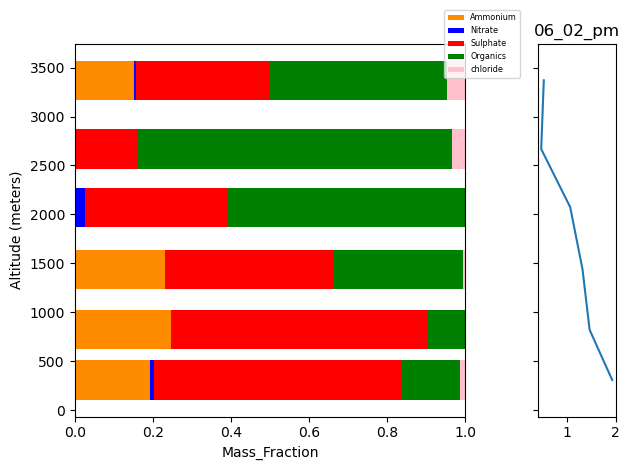

In [64]:
normal = (Day_2b[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_2b[' Org_Ave_IsoK_STP_ZIEMBA']+Day_2b[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_2b[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_2b[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_2b['AMS'] = normal
Day_2b = Day_2b.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_2b[' NH4_Ave_IsoK_STP_ZIEMBA']/normal
y2 = Day_2b[' NO3_Ave_IsoK_STP_ZIEMBA']/normal
y3 = Day_2b[' SO4_Ave_IsoK_STP_ZIEMBA']/normal
y4 = Day_2b[' Org_Ave_IsoK_STP_ZIEMBA']/normal
y5 = Day_2b[' Chl_Ave_IsoK_STP_ZIEMBA']/normal
y6 = Day_2b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal


fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_2b[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_2b[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_2b[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_2b[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_2b[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_2b[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal, Day_2b[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.title('06_02_pm')
plt.tight_layout()

In [16]:
des2b = DAY2b_subset.describe()
des2b.loc[:,' Org_Ave_IsoK_STP_ZIEMBA':' Chl_Ave_IsoK_STP_ZIEMBA']

,Org_Ave_IsoK_STP_ZIEMBA,SO4_Ave_IsoK_STP_ZIEMBA,NO3_Ave_IsoK_STP_ZIEMBA,NH4_Ave_IsoK_STP_ZIEMBA,Chl_Ave_IsoK_STP_ZIEMBA
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.397106,0.614504,-0.004734,0.183151,0.009308
min,-0.179000,0.076000,-0.113000,-0.205000,-0.038000
25%,0.235000,0.189000,-0.049000,-0.011000,-0.009000
50%,0.394000,0.532000,0.001000,0.205000,0.009000
75%,0.506000,0.988000,0.025000,0.372000,0.028000
max,1.357000,1.537000,0.111000,0.552000,0.056000
std,0.284727,0.441162,0.052042,0.224060,0.024474


In [17]:
DAY3 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220603_R0_20230418T125942.ict')
start_index= np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 14:30:00"))
stop_index= np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 15:00:00"))
    
DAY3_subset = DAY3[start_index[0][0]:stop_index[0][0]]
DAY3_subset = DAY3_subset.replace(-888888, 0)
DAY3_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
6067,2022-06-03 14:30:00,2022-06-03 14:30:01,34.190994,-67.265135,1562.46,16.540,23.600,837.685,8710.74,NaN,...,NaN,0.227,2.985,0.0,0.053600,0.01164,0.1022,0.6197,0.909,0.01155
6068,2022-06-03 14:30:01,2022-06-03 14:30:02,34.190286,-67.266362,1561.51,16.525,23.740,837.530,8688.73,NaN,...,NaN,0.227,2.985,0.0,0.053600,0.01164,0.1022,0.6197,0.909,0.01155
6069,2022-06-03 14:30:02,2022-06-03 14:30:03,34.189579,-67.267591,1560.55,16.555,22.570,837.815,8670.20,NaN,...,NaN,0.227,2.985,0.0,0.053600,0.01164,0.1022,0.6197,0.909,0.01155
6070,2022-06-03 14:30:03,2022-06-03 14:30:04,34.188873,-67.268822,1559.66,16.575,22.835,838.045,8721.81,NaN,...,NaN,0.227,2.985,0.0,0.053600,0.01164,0.1022,0.6197,0.909,0.01155
6071,2022-06-03 14:30:04,2022-06-03 14:30:05,34.188167,-67.270053,1558.86,16.565,24.350,837.975,8656.78,NaN,...,NaN,0.227,2.985,0.0,0.053600,0.01164,0.1022,0.6197,0.909,0.01155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,2022-06-03 14:59:55,2022-06-03 14:59:56,32.712767,-65.244314,2413.61,10.995,19.635,758.980,11519.60,NaN,...,NaN,0.000,1.750,0.0,0.001035,0.00000,0.0000,0.0000,0.000,0.02075
7863,2022-06-03 14:59:56,2022-06-03 14:59:57,32.712103,-65.243151,2408.15,11.045,19.630,759.535,11649.70,NaN,...,NaN,0.000,1.750,0.0,0.001035,0.00000,0.0000,0.0000,0.000,0.02075
7864,2022-06-03 14:59:57,2022-06-03 14:59:58,32.711441,-65.241989,2402.02,11.090,20.125,760.065,11698.40,NaN,...,NaN,0.000,1.750,0.0,0.001035,0.00000,0.0000,0.0000,0.000,0.02075
7865,2022-06-03 14:59:58,2022-06-03 14:59:59,32.710779,-65.240827,2395.43,11.130,20.650,760.570,11817.70,NaN,...,NaN,0.000,1.750,0.0,0.001035,0.00000,0.0000,0.0000,0.000,0.02075


In [18]:
Day_3 = DAY3_subset.resample('5.5T', on='Time_Start').median()
Day_3
#3.5

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-03 14:29:00,2022-06-03 14:32:15.500,34.102276,-67.436038,1557.495,16.2375,22.8050,838.0475,8080.535,NaN,36.7,...,NaN,0.0,2.311,0.0,0.005895,0.0,0.0,0.24170,0.1714,0.020900
2022-06-03 14:34:30,2022-06-03 14:37:15.500,33.882170,-67.286473,3874.725,3.2875,21.5500,632.6650,5275.695,70.55,39.5,...,NaN,0.0,7.153,0.0,0.023820,0.0,0.0,0.01979,0.0000,0.022880
2022-06-03 14:40:00,2022-06-03 14:42:45.500,33.597291,-66.792958,5563.230,-6.0850,19.3125,511.9375,5448.600,76.30,71.9,...,NaN,0.0,6.301,0.0,0.014640,0.0,0.0,0.00000,0.0000,0.014830
2022-06-03 14:45:30,2022-06-03 14:48:15.500,33.284596,-66.233488,5557.555,-6.0725,17.8200,512.8250,5294.930,74.70,70.4,...,NaN,0.0,6.036,0.0,0.016680,0.0,0.0,0.00000,0.0000,0.021770
2022-06-03 14:51:00,2022-06-03 14:53:45.500,32.974348,-65.703143,4814.025,-2.0050,17.2925,564.2000,5671.435,79.90,64.4,...,NaN,0.0,9.001,0.0,0.011900,0.0,0.0,0.00000,0.0000,0.006225
2022-06-03 14:56:30,2022-06-03 14:58:15.500,32.777898,-65.363864,3065.525,7.5700,18.8800,701.4300,10304.600,NaN,70.7,...,NaN,0.0,1.750,0.0,0.001035,0.0,0.0,0.00000,0.0000,0.020750


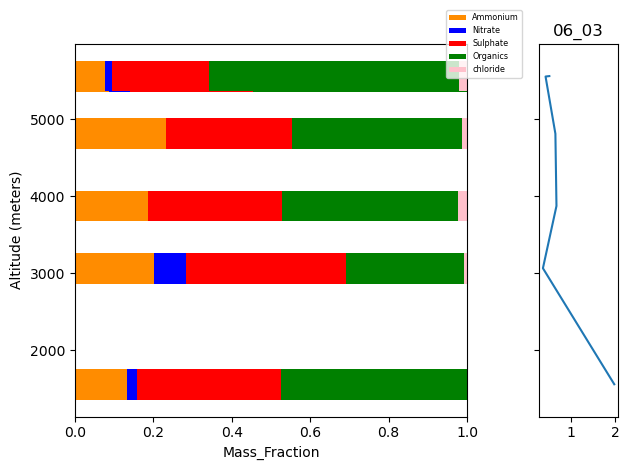

In [67]:
normal3 = (Day_3[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_3[' Org_Ave_IsoK_STP_ZIEMBA']+Day_3[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_3[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_3[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_3['AMS'] = normal3
Day_3 = Day_3.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_3[' NH4_Ave_IsoK_STP_ZIEMBA']/normal3
y2 = Day_3[' NO3_Ave_IsoK_STP_ZIEMBA']/normal3
y3 = Day_3[' SO4_Ave_IsoK_STP_ZIEMBA']/normal3
y4 = Day_3[' Org_Ave_IsoK_STP_ZIEMBA']/normal3
y5 = Day_3[' Chl_Ave_IsoK_STP_ZIEMBA']/normal3
y6 = Day_3[' mz44_Ave_IsoK_STP_ZIEMBA']/normal3
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_3[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_3[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_3[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_3[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_3[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_3[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal3, Day_3[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_03')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [20]:
des3 = DAY3_subset.describe()
des3.loc[:,' Org_Ave_IsoK_STP_ZIEMBA':' Chl_Ave_IsoK_STP_ZIEMBA']

,Org_Ave_IsoK_STP_ZIEMBA,SO4_Ave_IsoK_STP_ZIEMBA,NO3_Ave_IsoK_STP_ZIEMBA,NH4_Ave_IsoK_STP_ZIEMBA,Chl_Ave_IsoK_STP_ZIEMBA
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.367672,0.261131,0.018266,0.130363,-0.000091
min,-0.238000,0.024000,-0.086000,-0.242000,-0.051000
25%,0.117000,0.133500,-0.019750,0.027250,-0.020000
50%,0.301000,0.195000,0.013000,0.119000,-0.002000
75%,0.443000,0.257000,0.053000,0.224000,0.022000
max,1.717000,0.911000,0.184000,0.672000,0.052000
std,0.367698,0.219223,0.055583,0.174643,0.023970


In [21]:
DAY7 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220607_R0_L1_20230418T125943.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]
DAY7_subset = DAY7_subset.replace(-888888, 0)
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
10397,2022-06-07 14:32:00,2022-06-07 14:32:01,32.250498,-64.999220,127.595,21.705,22.545,1000.690,16839.20,NaN,...,NaN,7.07,3.401,0.1476,0.5651,0.4508,11.59,2.16,2.533,0.02453
10398,2022-06-07 14:32:01,2022-06-07 14:32:02,32.249883,-64.998233,126.585,21.705,21.935,1000.730,16797.70,NaN,...,NaN,7.07,3.401,0.1476,0.5651,0.4508,11.59,2.16,2.533,0.02453
10399,2022-06-07 14:32:02,2022-06-07 14:32:03,32.249267,-64.997244,125.870,21.700,22.630,1000.550,16749.30,NaN,...,NaN,7.07,3.401,0.1476,0.5651,0.4508,11.59,2.16,2.533,0.02453
10400,2022-06-07 14:32:03,2022-06-07 14:32:04,32.248648,-64.996254,125.955,21.735,22.880,1000.850,16872.70,NaN,...,NaN,7.07,3.401,0.1476,0.5651,0.4508,11.59,2.16,2.533,0.02453
10401,2022-06-07 14:32:04,2022-06-07 14:32:05,32.248027,-64.995263,126.990,21.755,22.120,1001.140,16893.50,NaN,...,NaN,7.07,3.401,0.1476,0.5651,0.4508,11.59,2.16,2.533,0.02453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,2022-06-07 14:46:55,2022-06-07 14:46:56,32.255021,-64.999573,2800.660,9.430,19.765,728.710,4644.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11293,2022-06-07 14:46:56,2022-06-07 14:46:57,32.255098,-64.998248,2805.770,9.405,20.085,728.240,4638.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11294,2022-06-07 14:46:57,2022-06-07 14:46:58,32.255152,-64.996919,2810.920,9.380,18.760,727.790,4632.07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11295,2022-06-07 14:46:58,2022-06-07 14:46:59,32.255184,-64.995588,2816.140,9.355,16.365,727.350,4619.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Day_7 = DAY7_subset.resample('3.5T', on='Time_Start').median()
Day_7

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-07 14:31:30,2022-06-07 14:33:30.500,32.206818,-65.009413,333.090,19.8800,22.4500,977.3650,16665.400,NaN,70.15,...,NaN,7.070,3.401,0.1476,0.5651,0.45080,11.590,2.160,2.533,0.02453
2022-06-07 14:35:00,2022-06-07 14:36:45.500,32.203740,-65.019811,805.345,15.7975,21.7425,925.0325,15095.900,NaN,77.30,...,NaN,4.618,3.106,0.1077,0.3672,0.09372,6.745,1.614,1.947,0.02316
2022-06-07 14:38:30,2022-06-07 14:40:15.500,32.216957,-65.022911,1390.345,13.9550,21.1750,862.9000,4003.770,NaN,21.70,...,NaN,4.618,3.106,0.1077,0.3672,0.09372,6.745,1.614,1.947,0.02316
2022-06-07 14:42:00,2022-06-07 14:43:45.500,32.202158,-64.997661,2001.575,13.5700,20.9000,802.2800,1600.295,NaN,8.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-07 14:45:30,2022-06-07 14:46:15.500,32.234845,-65.045546,2579.970,10.6275,20.7675,748.2300,4295.770,NaN,25.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


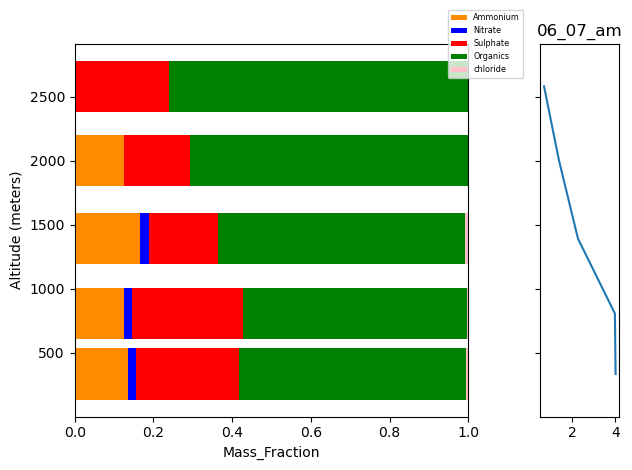

In [69]:
normal7 = (Day_7[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_7[' Org_Ave_IsoK_STP_ZIEMBA']+Day_7[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_7[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_7[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_7['AMS'] = normal7
Day_7 = Day_7.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_7[' NH4_Ave_IsoK_STP_ZIEMBA']/normal7
y2 = Day_7[' NO3_Ave_IsoK_STP_ZIEMBA']/normal7
y3 = Day_7[' SO4_Ave_IsoK_STP_ZIEMBA']/normal7
y4 = Day_7[' Org_Ave_IsoK_STP_ZIEMBA']/normal7
y5 = Day_7[' Chl_Ave_IsoK_STP_ZIEMBA']/normal7
y6 = Day_7[' mz44_Ave_IsoK_STP_ZIEMBA']/normal7
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_7[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_7[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_7[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_7[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_7[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_7[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal7, Day_7[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_07_am')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [24]:
DAY7b = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220607_R0_L2_20230418T125943.ict')
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
DAY7b_subset = DAY7b[start_index[0][0]:stop_index[0][0]]
DAY7b_subset = DAY7b_subset.replace(-888888, 0)
DAY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
10420,2022-06-07 19:08:00,2022-06-07 19:08:01,32.242823,-65.003952,133.320,21.455,22.385,1000.570,15735.40,NaN,...,NaN,4.213,3.328,0.08155,0.2793,0.02585,2.497,0.2221,0.3838,0.01698
10421,2022-06-07 19:08:01,2022-06-07 19:08:02,32.243085,-65.002775,133.120,21.445,22.805,1000.450,15843.90,NaN,...,NaN,4.213,3.328,0.08155,0.2793,0.02585,2.497,0.2221,0.3838,0.01698
10422,2022-06-07 19:08:02,2022-06-07 19:08:03,32.243347,-65.001596,132.930,21.440,22.970,1000.440,15702.70,NaN,...,NaN,4.213,3.328,0.08155,0.2793,0.02585,2.497,0.2221,0.3838,0.01698
10423,2022-06-07 19:08:03,2022-06-07 19:08:04,32.243610,-65.000416,132.720,21.460,23.120,1000.480,15831.60,NaN,...,NaN,4.213,3.328,0.08155,0.2793,0.02585,2.497,0.2221,0.3838,0.01698
10424,2022-06-07 19:08:04,2022-06-07 19:08:05,32.243873,-64.999235,132.595,21.475,23.565,999.490,15879.90,NaN,...,NaN,4.213,3.328,0.08155,0.2793,0.02585,2.497,0.2221,0.3838,0.01698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315,2022-06-07 19:22:55,2022-06-07 19:22:56,32.296480,-65.011792,3518.030,5.895,21.625,667.750,2764.12,NaN,...,NaN,0.000,6.683,0.00000,0.0415,0.00000,0.000,0.0000,0.0000,0.01548
11316,2022-06-07 19:22:56,2022-06-07 19:22:57,32.296519,-65.013093,3524.890,5.850,21.850,667.230,2756.72,NaN,...,NaN,0.000,6.683,0.00000,0.0415,0.00000,0.000,0.0000,0.0000,0.01548
11317,2022-06-07 19:22:57,2022-06-07 19:22:58,32.296518,-65.014396,3531.840,5.795,21.220,666.645,2770.03,NaN,...,NaN,0.000,6.683,0.00000,0.0415,0.00000,0.000,0.0000,0.0000,0.01548
11318,2022-06-07 19:22:58,2022-06-07 19:22:59,32.296479,-65.015699,3538.850,5.735,21.080,666.015,2763.17,NaN,...,NaN,0.000,6.683,0.00000,0.0415,0.00000,0.000,0.0000,0.0000,0.01548


In [25]:
Day_7b = DAY7b_subset.resample('2.5T', on='Time_Start').median()
Day_7b

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-07 19:07:30,2022-06-07 19:09:00.500,32.288606,-64.990347,314.0375,19.8325,23.7450,979.0875,15077.400,NaN,63.45,...,NaN,4.213000,3.328,0.081550,0.27930,0.02585,2.497,0.2221,0.3838,0.016980
2022-06-07 19:10:00,2022-06-07 19:11:15.500,32.255800,-65.006124,754.5825,15.5700,22.5450,929.6075,15249.600,NaN,81.00,...,NaN,4.213000,3.328,0.081550,0.27930,0.02585,2.497,0.2221,0.3838,0.016980
2022-06-07 19:12:30,2022-06-07 19:13:45.500,32.255877,-65.034815,1245.6900,13.6050,20.7625,877.0675,5981.895,NaN,33.60,...,NaN,1.219000,4.858,0.008394,0.08971,0.00000,1.195,0.4025,0.3962,0.016220
2022-06-07 19:15:00,2022-06-07 19:16:15.500,32.274343,-65.034567,1709.5850,14.9700,21.5625,830.1875,819.080,NaN,4.00,...,NaN,1.219000,4.858,0.008394,0.08971,0.00000,1.195,0.4025,0.3962,0.016220
2022-06-07 19:17:30,2022-06-07 19:18:45.500,32.264209,-64.995370,2123.4050,13.5475,21.6725,790.4100,4516.230,NaN,23.55,...,NaN,0.009271,6.383,0.000000,0.07409,0.00000,0.000,0.0000,0.0000,0.009943
2022-06-07 19:20:00,2022-06-07 19:21:15.500,32.240348,-65.007564,2858.7350,9.7250,20.2875,723.6025,4439.605,NaN,25.15,...,NaN,0.009271,6.383,0.000000,0.07409,0.00000,0.000,0.0000,0.0000,0.009943
2022-06-07 19:22:30,2022-06-07 19:22:45.500,32.293713,-64.998683,3450.5850,6.2500,21.4375,673.3250,3086.540,NaN,21.85,...,NaN,0.000000,6.683,0.000000,0.04150,0.00000,0.000,0.0000,0.0000,0.015480


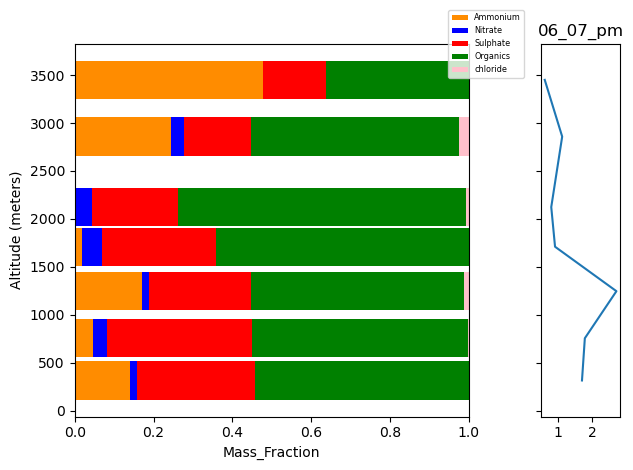

In [70]:
normal7b = (Day_7b[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_7b[' Org_Ave_IsoK_STP_ZIEMBA']+Day_7b[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_7b[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_7b[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_7b['AMS'] = normal7b
Day_7b = Day_7b.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_7b[' NH4_Ave_IsoK_STP_ZIEMBA']/normal7b
y2 = Day_7b[' NO3_Ave_IsoK_STP_ZIEMBA']/normal7b
y3 = Day_7b[' SO4_Ave_IsoK_STP_ZIEMBA']/normal7b
y4 = Day_7b[' Org_Ave_IsoK_STP_ZIEMBA']/normal7b
y5 = Day_7b[' Chl_Ave_IsoK_STP_ZIEMBA']/normal7b
y6 = Day_7b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal7b
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_7b[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_7b[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_7b[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_7b[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_7b[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_7b[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal7b, Day_7b[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_07_pm')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [71]:
DAY8 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220608_R0_L2_20230418T125946.ict')
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset = DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subset = DAY8_subset.replace(-888888, 0)
DAY8_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
10668,2022-06-08 20:30:00,2022-06-08 20:30:01,32.267080,-64.998961,152.725,21.365,23.280,996.830,15886.50,NaN,...,NaN,4.254,2.9990,0.1078,0.31160,0.0144,5.296,0.4628,1.324,0.009514
10669,2022-06-08 20:30:01,2022-06-08 20:30:02,32.268158,-64.999178,153.350,21.390,23.150,997.210,15896.40,NaN,...,NaN,4.254,2.9990,0.1078,0.31160,0.0144,5.296,0.4628,1.324,0.009514
10670,2022-06-08 20:30:02,2022-06-08 20:30:03,32.269234,-64.999434,153.870,21.405,23.515,997.280,15824.80,NaN,...,NaN,4.254,2.9990,0.1078,0.31160,0.0144,5.296,0.4628,1.324,0.009514
10671,2022-06-08 20:30:03,2022-06-08 20:30:04,32.270310,-64.999724,154.255,21.375,23.435,996.955,15730.00,NaN,...,NaN,4.254,2.9990,0.1078,0.31160,0.0144,5.296,0.4628,1.324,0.009514
10672,2022-06-08 20:30:04,2022-06-08 20:30:05,32.271382,-65.000051,154.510,21.390,23.380,997.080,15669.80,NaN,...,NaN,4.254,2.9990,0.1078,0.31160,0.0144,5.296,0.4628,1.324,0.009514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,2022-06-08 20:44:55,2022-06-08 20:44:56,32.251172,-65.086081,3838.620,3.190,19.385,642.185,7232.41,NaN,...,NaN,0.000,0.8931,0.0000,0.01511,0.0000,0.000,0.0000,0.000,0.020120
11564,2022-06-08 20:44:56,2022-06-08 20:44:57,32.250122,-65.085465,3847.170,3.130,20.305,641.500,7435.93,NaN,...,NaN,0.000,0.8931,0.0000,0.01511,0.0000,0.000,0.0000,0.000,0.020120
11565,2022-06-08 20:44:57,2022-06-08 20:44:58,32.249088,-65.084808,3855.660,3.065,20.950,640.845,7422.39,NaN,...,NaN,0.000,0.8931,0.0000,0.01511,0.0000,0.000,0.0000,0.000,0.020120
11566,2022-06-08 20:44:58,2022-06-08 20:44:59,32.248074,-65.084107,3864.100,3.005,20.875,640.175,7427.72,NaN,...,NaN,0.000,0.8931,0.0000,0.01511,0.0000,0.000,0.0000,0.000,0.020120


In [72]:
Day_8 = DAY8_subset.resample('3T', on='Time_Start').median()
Day_8

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-08 20:30:00,2022-06-08 20:31:30.500,32.276725,-65.058533,268.6075,20.4125,22.7800,984.5775,16289.400,NaN,68.05,...,NaN,4.388,3.2110,0.08932,0.35260,0.04131,7.254,0.6512,1.7970,0.004408
2022-06-08 20:33:00,2022-06-08 20:34:30.500,32.290863,-65.050812,851.7600,14.9425,21.5375,918.3600,15517.450,NaN,82.60,...,NaN,4.388,3.2110,0.08932,0.35260,0.04131,7.254,0.6512,1.7970,0.004408
2022-06-08 20:36:00,2022-06-08 20:37:30.500,32.275706,-65.046322,1377.3700,17.1650,20.6950,863.2475,3607.265,NaN,15.55,...,NaN,1.598,2.4820,0.02073,0.15850,0.16410,2.046,0.1262,0.5608,0.006602
2022-06-08 20:39:00,2022-06-08 20:40:30.500,32.266352,-65.044568,2110.1350,13.9200,20.7350,791.7750,4729.065,NaN,23.75,...,NaN,1.598,2.4820,0.02073,0.15850,0.16410,2.046,0.1262,0.5608,0.006602
2022-06-08 20:42:00,2022-06-08 20:43:30.500,32.264629,-65.050571,3116.6600,8.7950,20.3225,701.9025,4480.600,NaN,25.55,...,NaN,0.000,0.8931,0.00000,0.01511,0.00000,0.000,0.0000,0.0000,0.020120


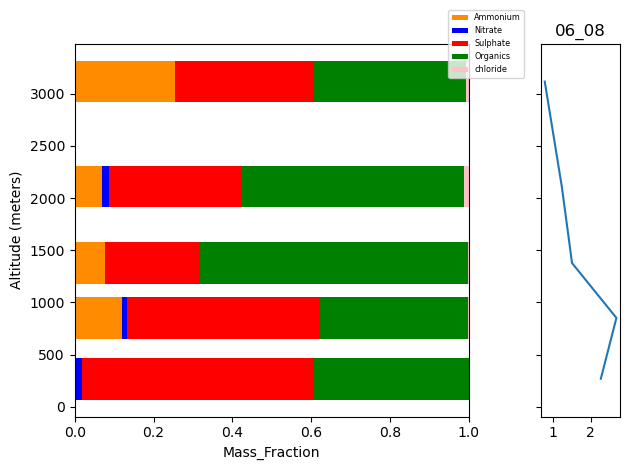

In [73]:
normal8 = (Day_8[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_8[' Org_Ave_IsoK_STP_ZIEMBA']+Day_8[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_8[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_8[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_8['AMS'] = normal8
Day_8 = Day_8.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_8[' NH4_Ave_IsoK_STP_ZIEMBA']/normal8
y2 = Day_8[' NO3_Ave_IsoK_STP_ZIEMBA']/normal8
y3 = Day_8[' SO4_Ave_IsoK_STP_ZIEMBA']/normal8
y4 = Day_8[' Org_Ave_IsoK_STP_ZIEMBA']/normal8
y5 = Day_8[' Chl_Ave_IsoK_STP_ZIEMBA']/normal8
y6 = Day_8[' mz44_Ave_IsoK_STP_ZIEMBA']/normal8
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_8[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_8[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_8[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_8[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_8[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_8[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal8, Day_8[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_08')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [30]:
DAY10 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220610_R0_L1_20230418T125949.ict')
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]
DAY10_subset = DAY10_subset.replace(-888888, 0)
DAY10_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
10616,2022-06-10 15:17:00,2022-06-10 15:17:01,32.206691,-64.996969,122.040,23.330,23.305,999.380,25488.50,NaN,...,NaN,1.92600,1.935,0.0299,0.09652,0.07953,3.14000,0.7048,1.5430,0.005271
10617,2022-06-10 15:17:01,2022-06-10 15:17:02,32.207809,-64.997169,122.105,23.320,23.445,999.460,25497.90,NaN,...,NaN,1.92600,1.935,0.0299,0.09652,0.07953,3.14000,0.7048,1.5430,0.005271
10618,2022-06-10 15:17:02,2022-06-10 15:17:03,32.208928,-64.997370,122.170,23.280,23.885,999.100,25324.60,NaN,...,NaN,1.92600,1.935,0.0299,0.09652,0.07953,3.14000,0.7048,1.5430,0.005271
10619,2022-06-10 15:17:03,2022-06-10 15:17:04,32.210048,-64.997569,122.240,23.315,23.840,998.935,25191.40,NaN,...,NaN,1.92600,1.935,0.0299,0.09652,0.07953,3.14000,0.7048,1.5430,0.005271
10620,2022-06-10 15:17:04,2022-06-10 15:17:05,32.211167,-64.997768,122.315,23.370,24.465,999.405,25468.50,NaN,...,NaN,1.92600,1.935,0.0299,0.09652,0.07953,3.14000,0.7048,1.5430,0.005271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,2022-06-10 15:24:55,2022-06-10 15:24:56,32.207088,-65.031191,3540.260,7.225,19.115,666.390,6057.59,NaN,...,NaN,0.02667,2.350,0.0000,0.03044,0.00000,0.08028,0.1594,0.2965,0.009856
11092,2022-06-10 15:24:56,2022-06-10 15:24:57,32.207061,-65.029663,3546.970,7.175,19.305,665.850,6032.39,NaN,...,NaN,0.02667,2.350,0.0000,0.03044,0.00000,0.08028,0.1594,0.2965,0.009856
11093,2022-06-10 15:24:57,2022-06-10 15:24:58,32.207068,-65.028134,3553.620,7.145,19.265,665.320,6169.95,NaN,...,NaN,0.02667,2.350,0.0000,0.03044,0.00000,0.08028,0.1594,0.2965,0.009856
11094,2022-06-10 15:24:58,2022-06-10 15:24:59,32.207109,-65.026603,3560.200,7.115,19.035,664.770,6278.46,NaN,...,NaN,0.02667,2.350,0.0000,0.03044,0.00000,0.08028,0.1594,0.2965,0.009856


In [31]:
Day_10 = DAY10_subset.resample('1.5T', on='Time_Start').median()
Day_10

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-10 15:16:30,2022-06-10 15:17:30.500,32.239734,-65.002886,123.8575,23.1650,23.4375,998.9900,25508.450,NaN,90.20,...,NaN,1.92600,1.935,0.0299,0.09652,0.079530,3.14000,0.7048,1.5430,0.005271
2022-06-10 15:18:00,2022-06-10 15:18:45.500,32.295005,-65.055596,578.7975,20.5850,23.0625,947.8650,22757.350,NaN,87.90,...,NaN,1.92600,1.935,0.0299,0.09652,0.079530,3.14000,0.7048,1.5430,0.005271
2022-06-10 15:19:30,2022-06-10 15:20:15.500,32.231247,-65.101253,1359.3400,16.2100,21.6850,865.1700,19116.050,NaN,89.55,...,NaN,0.29380,2.526,0.0000,0.05730,0.003097,0.16340,0.2987,0.4923,0.005688
2022-06-10 15:21:00,2022-06-10 15:21:45.500,32.242946,-64.998998,2107.0050,12.8125,19.5050,792.0075,15056.650,NaN,79.90,...,NaN,0.29380,2.526,0.0000,0.05730,0.003097,0.16340,0.2987,0.4923,0.005688
2022-06-10 15:22:30,2022-06-10 15:23:15.500,32.294560,-65.064780,2806.7800,10.7625,19.9050,728.2400,8778.575,NaN,49.60,...,NaN,0.29380,2.526,0.0000,0.05730,0.003097,0.16340,0.2987,0.4923,0.005688
2022-06-10 15:24:00,2022-06-10 15:24:30.500,32.218459,-65.066519,3347.9250,8.1875,19.2300,682.1900,9352.860,NaN,57.10,...,NaN,0.02667,2.350,0.0000,0.03044,0.000000,0.08028,0.1594,0.2965,0.009856


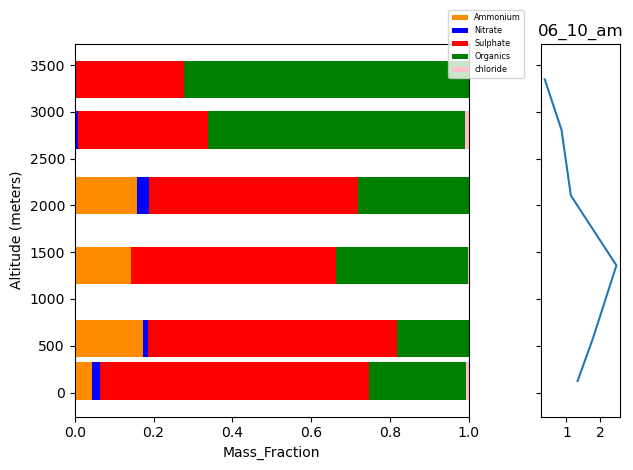

In [76]:
normal10 = (Day_10[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_10[' Org_Ave_IsoK_STP_ZIEMBA']+Day_10[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_10[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_10[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_10['AMS'] = normal10
Day_10 = Day_10.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_10[' NH4_Ave_IsoK_STP_ZIEMBA']/normal10
y2 = Day_10[' NO3_Ave_IsoK_STP_ZIEMBA']/normal10
y3 = Day_10[' SO4_Ave_IsoK_STP_ZIEMBA']/normal10
y4 = Day_10[' Org_Ave_IsoK_STP_ZIEMBA']/normal10
y5 = Day_10[' Chl_Ave_IsoK_STP_ZIEMBA']/normal10
y6 = Day_10[' mz44_Ave_IsoK_STP_ZIEMBA']/normal10
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_10[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_10[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_10[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_10[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_10[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_10[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal10, Day_10[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_10_am')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [33]:
DAY10b = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220610_R0_L2_20230418T125949.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:45:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY10b_subset = DAY10b_subset.replace(-888888, 0)
DAY10b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
7182,2022-06-10 19:30:00,2022-06-10 19:30:01,31.639092,-65.606420,113.375,24.160,24.355,999.250,26111.6,NaN,...,NaN,0.4708,0.5737,0.0,0.03287,0.0,0.4695,0.2604,0.4178,0.01330
7183,2022-06-10 19:30:01,2022-06-10 19:30:02,31.639446,-65.607515,113.225,24.150,23.370,999.225,26120.5,NaN,...,NaN,0.4708,0.5737,0.0,0.03287,0.0,0.4695,0.2604,0.4178,0.01330
7184,2022-06-10 19:30:02,2022-06-10 19:30:03,31.639806,-65.608607,113.065,24.135,23.545,999.200,26162.0,NaN,...,NaN,0.4708,0.5737,0.0,0.03287,0.0,0.4695,0.2604,0.4178,0.01330
7185,2022-06-10 19:30:03,2022-06-10 19:30:04,31.640170,-65.609698,112.970,24.125,23.970,999.235,26162.8,NaN,...,NaN,0.4708,0.5737,0.0,0.03287,0.0,0.4695,0.2604,0.4178,0.01330
7186,2022-06-10 19:30:04,2022-06-10 19:30:05,31.640539,-65.610788,112.985,24.120,23.890,999.250,26155.5,NaN,...,NaN,0.4708,0.5737,0.0,0.03287,0.0,0.4695,0.2604,0.4178,0.01330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,2022-06-10 20:44:55,2022-06-10 20:44:56,32.077748,-64.914861,1636.660,15.025,21.325,837.185,18063.7,NaN,...,NaN,0.1693,4.9990,0.0,0.01969,0.0,0.2694,0.5622,0.8160,0.02086
11678,2022-06-10 20:44:56,2022-06-10 20:44:57,32.078715,-64.913869,1630.380,15.080,22.020,837.970,18251.3,NaN,...,NaN,0.1693,4.9990,0.0,0.01969,0.0,0.2694,0.5622,0.8160,0.02086
11679,2022-06-10 20:44:57,2022-06-10 20:44:58,32.079681,-64.912880,1624.290,15.130,22.545,838.580,18173.8,NaN,...,NaN,0.1693,4.9990,0.0,0.01969,0.0,0.2694,0.5622,0.8160,0.02086
11680,2022-06-10 20:44:58,2022-06-10 20:44:59,32.080646,-64.911895,1618.170,15.145,22.750,839.105,18277.0,NaN,...,NaN,0.1693,4.9990,0.0,0.01969,0.0,0.2694,0.5622,0.8160,0.02086


In [95]:
Day_10b = DAY10b_subset.resample('9.5T', on='Time_Start').median()
Day_10b
#9

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-10 19:28:30,2022-06-10 19:34:00.500,31.767699,-65.825383,118.0300,23.9350,23.6875,998.7475,26311.600,NaN,87.40,...,NaN,1.9720,3.383,0.07241,0.156200,0.16830,0.4764,0.378300,0.4653,0.012850
2022-06-10 19:38:00,2022-06-10 19:42:45.500,31.809228,-65.835132,2950.5950,9.6975,20.2475,715.4100,10995.400,38.40,66.85,...,NaN,0.0000,5.546,0.00000,0.044040,0.00000,0.0000,0.000000,0.0000,0.009554
2022-06-10 19:47:30,2022-06-10 19:52:15.500,31.199548,-65.976932,4911.0650,-1.5475,13.3150,560.3375,4548.630,35.95,39.25,...,NaN,0.1254,4.634,0.00000,0.021820,0.00000,0.2719,0.006370,0.0000,0.008273
2022-06-10 19:57:00,2022-06-10 20:01:45.500,31.137587,-65.970407,2841.4900,9.0000,11.7975,724.0550,11640.450,NaN,74.40,...,NaN,0.2494,7.398,0.00000,0.013440,0.00000,0.3347,0.009358,0.0000,0.011360
2022-06-10 20:06:30,2022-06-10 20:11:15.500,31.152691,-65.949427,1873.8000,12.8450,17.8950,813.8125,16255.550,NaN,89.00,...,NaN,0.2120,6.599,0.00000,0.006776,0.00000,0.4506,0.107800,0.0958,0.011750
2022-06-10 20:16:00,2022-06-10 20:20:45.500,31.161385,-65.924816,588.5925,21.4050,23.9375,946.2000,22382.450,NaN,85.05,...,NaN,3.6670,5.435,0.16780,0.030080,0.00000,4.9530,2.141000,2.8280,0.003156
2022-06-10 20:25:30,2022-06-10 20:30:15.500,31.337065,-65.797260,2832.4150,9.6800,20.5025,726.1025,12252.800,34.65,70.40,...,NaN,0.4275,4.856,0.02691,0.102100,0.03859,0.6010,0.548600,0.8317,0.031210
2022-06-10 20:35:00,2022-06-10 20:39:45.500,31.769824,-65.274815,4325.8150,2.1175,18.1950,604.2500,5107.305,34.30,44.30,...,NaN,0.0000,4.764,0.00000,0.069170,0.41420,0.0000,0.000000,0.0000,0.009176
2022-06-10 20:44:30,2022-06-10 20:44:45.500,32.067571,-64.925463,1722.2350,14.4525,21.9750,828.4200,17216.500,NaN,85.70,...,NaN,0.1693,4.999,0.00000,0.019690,0.00000,0.2694,0.562200,0.8160,0.020860


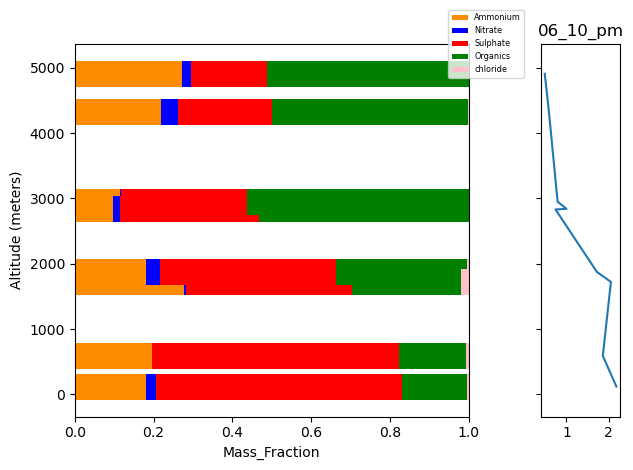

In [97]:
normal10b = (Day_10b[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_10b[' Org_Ave_IsoK_STP_ZIEMBA']+Day_10b[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_10b[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_10b[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_10b['AMS'] = normal8
Day_10b = Day_10b.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_10b[' NH4_Ave_IsoK_STP_ZIEMBA']/normal10b
y2 = Day_10b[' NO3_Ave_IsoK_STP_ZIEMBA']/normal10b
y3 = Day_10b[' SO4_Ave_IsoK_STP_ZIEMBA']/normal10b
y4 = Day_10b[' Org_Ave_IsoK_STP_ZIEMBA']/normal10b
y5 = Day_10b[' Chl_Ave_IsoK_STP_ZIEMBA']/normal10b
y6 = Day_10b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal10b
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_10b[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_10b[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_10b[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_10b[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_10b[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_10b[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal10b, Day_10b[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_10_pm')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [36]:
DAY11 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220611_R0_L1_20230418T125952.ict')
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]
DAY11_subset = DAY11_subset.replace(-888888, 0)
DAY11_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
10800,2022-06-11 15:24:00,2022-06-11 15:24:01,32.234864,-64.977277,137.985,23.790,23.255,999.890,25501.70,NaN,...,NaN,0.41130,1.116,0.0,0.0373,0.02496,2.026,2.04000,2.454,0.002232
10801,2022-06-11 15:24:01,2022-06-11 15:24:02,32.233969,-64.976649,138.245,23.800,23.205,999.925,25359.00,NaN,...,NaN,0.41130,1.116,0.0,0.0373,0.02496,2.026,2.04000,2.454,0.002232
10802,2022-06-11 15:24:02,2022-06-11 15:24:03,32.233058,-64.976063,138.485,23.770,22.440,999.845,25607.50,NaN,...,NaN,0.41130,1.116,0.0,0.0373,0.02496,2.026,2.04000,2.454,0.002232
10803,2022-06-11 15:24:03,2022-06-11 15:24:04,32.232130,-64.975521,138.740,23.725,23.365,999.830,25821.30,NaN,...,NaN,0.41130,1.116,0.0,0.0373,0.02496,2.026,2.04000,2.454,0.002232
10804,2022-06-11 15:24:04,2022-06-11 15:24:05,32.231186,-64.975026,139.035,23.715,23.910,999.790,25578.10,NaN,...,NaN,0.41130,1.116,0.0,0.0373,0.02496,2.026,2.04000,2.454,0.002232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2022-06-11 15:41:55,2022-06-11 15:41:56,32.259305,-64.971567,4701.700,-0.945,19.485,579.020,5560.38,57.0,...,NaN,0.04583,4.912,0.0,0.0378,0.24420,0.000,0.05242,0.000,0.023010
11876,2022-06-11 15:41:56,2022-06-11 15:41:57,32.258543,-64.970428,4708.440,-0.995,18.435,578.440,5677.99,58.3,...,NaN,0.04583,4.912,0.0,0.0378,0.24420,0.000,0.05242,0.000,0.023010
11877,2022-06-11 15:41:57,2022-06-11 15:41:58,32.257745,-64.969326,4714.800,-1.050,17.980,577.855,5518.96,57.0,...,NaN,0.04583,4.912,0.0,0.0378,0.24420,0.000,0.05242,0.000,0.023010
11878,2022-06-11 15:41:58,2022-06-11 15:41:59,32.256913,-64.968261,4720.960,-1.060,18.320,577.585,5392.89,55.7,...,NaN,0.04583,4.912,0.0,0.0378,0.24420,0.000,0.05242,0.000,0.023010


In [37]:
Day_11 = DAY11_subset.resample('2.75T', on='Time_Start').median()
Day_11

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-11 15:24:00,2022-06-11 15:25:23.000,32.216662,-65.008293,200.720,23.715,23.7700,992.720,24526.400,NaN,82.90,...,NaN,0.41130,1.116,0.00000,0.03730,0.02496,2.0260,2.04000,2.4540,0.002232
2022-06-11 15:26:45,2022-06-11 15:28:08.000,32.223196,-65.002349,690.340,21.565,23.3600,938.415,18871.000,NaN,70.10,...,NaN,0.73000,2.916,0.05039,0.09927,0.22130,0.6197,0.73900,0.7889,0.015980
2022-06-11 15:29:30,2022-06-11 15:30:53.000,32.227562,-65.003648,1324.910,17.485,22.4900,871.550,17668.300,NaN,76.00,...,NaN,0.73000,2.916,0.05039,0.09927,0.22130,0.6197,0.73900,0.7889,0.015980
2022-06-11 15:32:15,2022-06-11 15:33:38.000,32.243772,-65.011843,1874.740,14.985,21.6850,817.070,15726.700,NaN,76.70,...,NaN,0.08668,3.818,0.00000,0.06062,0.95760,0.1730,0.26580,0.2868,0.006493
2022-06-11 15:35:00,2022-06-11 15:36:23.000,32.232670,-64.971078,2485.380,11.865,20.9150,759.575,13862.100,NaN,76.90,...,NaN,0.08668,3.818,0.00000,0.06062,0.95760,0.1730,0.26580,0.2868,0.006493
2022-06-11 15:37:45,2022-06-11 15:39:08.000,32.237317,-64.984696,3497.130,6.550,19.8400,672.480,9541.910,NaN,62.55,...,NaN,0.04583,4.912,0.00000,0.03780,0.24420,0.0000,0.05242,0.0000,0.023010
2022-06-11 15:40:30,2022-06-11 15:41:15.500,32.255671,-65.023201,4426.705,0.815,18.8675,599.405,5646.625,57.7,51.75,...,NaN,0.04583,4.912,0.00000,0.03780,0.24420,0.0000,0.05242,0.0000,0.023010


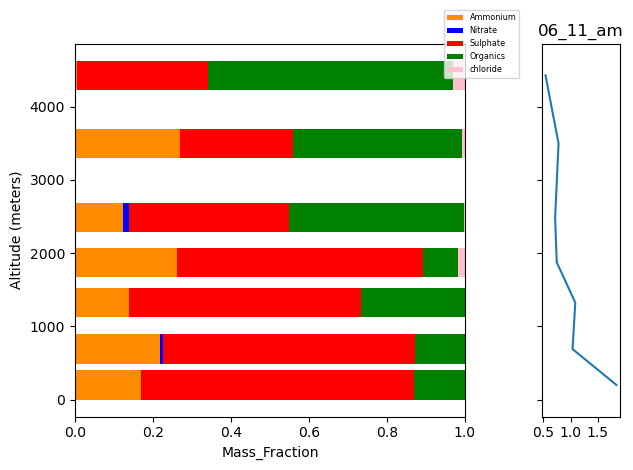

In [98]:
normal11 = (Day_11[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_11[' Org_Ave_IsoK_STP_ZIEMBA']+Day_11[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_11[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_11[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_11['AMS'] = normal11
Day_11 = Day_11.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_11[' NH4_Ave_IsoK_STP_ZIEMBA']/normal11
y2 = Day_11[' NO3_Ave_IsoK_STP_ZIEMBA']/normal11
y3 = Day_11[' SO4_Ave_IsoK_STP_ZIEMBA']/normal11
y4 = Day_11[' Org_Ave_IsoK_STP_ZIEMBA']/normal11
y5 = Day_11[' Chl_Ave_IsoK_STP_ZIEMBA']/normal11
y6 = Day_11[' mz44_Ave_IsoK_STP_ZIEMBA']/normal11
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_11[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_11[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_11[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_11[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_11[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_11[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal11, Day_11[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_11_am')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [39]:
DAY11b = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220611_R0_L2_20230418T125952.ict')
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:00:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:30:00"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
DAY11b_subset = DAY11b_subset.replace(-888888, 0)
DAY11b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
9350,2022-06-11 20:00:00,2022-06-11 20:00:01,30.851085,-64.222657,132.360,24.230,24.540,998.770,26406.7,NaN,...,NaN,3.3440,5.293,0.1343,0.22870,0.5176,5.31600,1.3230,3.11700,0.03994
9351,2022-06-11 20:00:01,2022-06-11 20:00:02,30.851840,-64.221712,132.715,24.200,24.865,998.555,26605.1,NaN,...,NaN,3.3440,5.293,0.1343,0.22870,0.5176,5.31600,1.3230,3.11700,0.03994
9352,2022-06-11 20:00:02,2022-06-11 20:00:03,30.852625,-64.220800,133.040,24.200,25.725,998.675,26238.9,NaN,...,NaN,3.3440,5.293,0.1343,0.22870,0.5176,5.31600,1.3230,3.11700,0.03994
9353,2022-06-11 20:00:03,2022-06-11 20:00:04,30.853437,-64.219921,133.300,24.200,26.445,998.645,26196.5,NaN,...,NaN,3.3440,5.293,0.1343,0.22870,0.5176,5.31600,1.3230,3.11700,0.03994
9354,2022-06-11 20:00:04,2022-06-11 20:00:05,30.854278,-64.219077,133.540,24.230,26.480,998.610,26700.0,NaN,...,NaN,3.3440,5.293,0.1343,0.22870,0.5176,5.31600,1.3230,3.11700,0.03994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,2022-06-11 20:29:55,2022-06-11 20:29:56,31.260152,-64.521769,3323.730,6.810,20.925,685.120,10322.8,NaN,...,NaN,0.1088,11.000,0.0392,0.03233,0.5191,0.01232,0.1134,0.05002,0.07358
11146,2022-06-11 20:29:56,2022-06-11 20:29:57,31.261412,-64.522059,3325.020,6.805,21.055,685.035,10338.5,NaN,...,NaN,0.1088,11.000,0.0392,0.03233,0.5191,0.01232,0.1134,0.05002,0.07358
11147,2022-06-11 20:29:57,2022-06-11 20:29:58,31.262673,-64.522348,3326.270,6.820,21.690,685.175,10312.2,NaN,...,NaN,0.1088,11.000,0.0392,0.03233,0.5191,0.01232,0.1134,0.05002,0.07358
11148,2022-06-11 20:29:58,2022-06-11 20:29:59,31.263934,-64.522638,3327.430,6.795,21.720,684.950,10325.2,NaN,...,NaN,0.1088,11.000,0.0392,0.03233,0.5191,0.01232,0.1134,0.05002,0.07358


In [119]:
Day_11b = DAY11b_subset.resample('5.25T', on='Time_Start').median()
Day_11b
#5

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-11 19:57:00,2022-06-11 20:01:08.000,30.906742,-64.246435,122.925,24.335,25.235,1000.3500,26468.00,NaN,87.1,...,NaN,3.34400,5.293,0.13430,0.22870,0.517600,5.31600,1.3230,3.11700,0.03994
2022-06-11 20:02:15,2022-06-11 20:04:53.000,31.067737,-64.466397,123.140,24.390,25.045,1000.3100,26613.80,NaN,87.2,...,NaN,2.60300,4.414,0.11160,0.22650,0.335500,3.63000,1.8770,2.87700,0.02980
2022-06-11 20:07:30,2022-06-11 20:10:08.000,31.239922,-64.672552,926.200,19.770,24.085,913.4250,19108.20,NaN,77.3,...,NaN,1.58000,6.108,0.13640,0.26700,0.326300,1.67600,3.4180,3.12400,0.03740
2022-06-11 20:12:45,2022-06-11 20:15:23.000,31.218156,-64.672437,2591.580,10.375,21.460,749.0500,13131.10,NaN,78.4,...,NaN,0.19800,6.891,0.00000,0.14380,0.171800,0.22700,0.4523,0.52920,0.06399
2022-06-11 20:18:00,2022-06-11 20:20:38.000,31.033389,-64.485601,2162.530,12.440,21.715,788.4550,14258.00,NaN,76.7,...,NaN,0.02363,8.946,0.02512,0.06339,0.078480,0.07789,0.1837,0.18390,0.07411
2022-06-11 20:23:15,2022-06-11 20:25:53.000,31.167112,-64.368189,2156.610,12.230,19.800,789.1000,14624.60,NaN,79.1,...,NaN,0.28060,10.980,0.00000,0.04013,0.006775,0.13900,0.2536,0.18990,0.07970
2022-06-11 20:28:30,2022-06-11 20:29:15.500,31.210098,-64.509518,3258.400,7.295,21.235,691.4125,10570.55,NaN,71.8,...,NaN,0.10880,11.000,0.03920,0.03233,0.519100,0.01232,0.1134,0.05002,0.07358


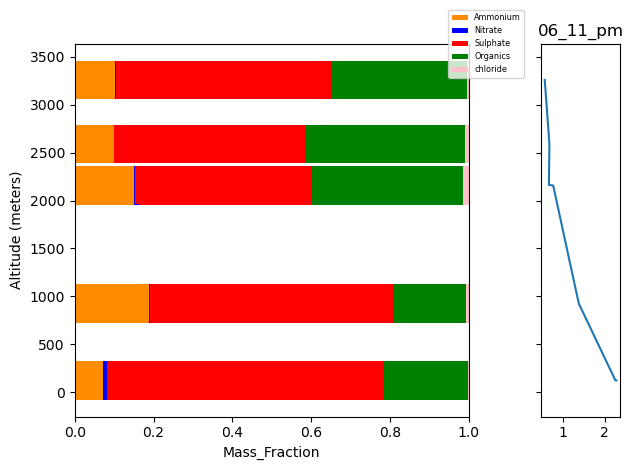

In [126]:
normal11b = (Day_11b[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_11b[' Org_Ave_IsoK_STP_ZIEMBA']+Day_11b[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_11b[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_11b[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_11b['AMS'] = normal11b
Day_11b = Day_11b.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_11b[' NH4_Ave_IsoK_STP_ZIEMBA']/normal11b
y2 = Day_11b[' NO3_Ave_IsoK_STP_ZIEMBA']/normal11b
y3 = Day_11b[' SO4_Ave_IsoK_STP_ZIEMBA']/normal11b
y4 = Day_11b[' Org_Ave_IsoK_STP_ZIEMBA']/normal11b
y5 = Day_11b[' Chl_Ave_IsoK_STP_ZIEMBA']/normal11b
y6 = Day_11b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal11b
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_11b[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_11b[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_11b[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_11b[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_11b[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_11b[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal11b, Day_11b[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_11_pm')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [127]:
DAY13 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220613_R0_L2_20230418T125955.ict')
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]
DAY13_subset = DAY13_subset.replace(-888888, 0)
DAY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
10610,2022-06-13 19:46:00,2022-06-13 19:46:01,32.251226,-65.007304,106.13,24.700,23.100,1005.880,26066.70,NaN,...,NaN,0.458,4.946,0.1562,0.12540,0.7750,0.8334,0.3617,0.9362,0.01781
10611,2022-06-13 19:46:01,2022-06-13 19:46:02,32.250414,-65.006555,105.59,24.680,24.330,1005.410,25646.30,NaN,...,NaN,0.458,4.946,0.1562,0.12540,0.7750,0.8334,0.3617,0.9362,0.01781
10612,2022-06-13 19:46:02,2022-06-13 19:46:03,32.249605,-65.005808,106.45,24.620,24.750,1004.580,25639.60,NaN,...,NaN,0.458,4.946,0.1562,0.12540,0.7750,0.8334,0.3617,0.9362,0.01781
10613,2022-06-13 19:46:03,2022-06-13 19:46:04,32.248799,-65.005062,108.91,24.565,24.825,1003.920,25552.00,NaN,...,NaN,0.458,4.946,0.1562,0.12540,0.7750,0.8334,0.3617,0.9362,0.01781
10614,2022-06-13 19:46:04,2022-06-13 19:46:05,32.247996,-65.004323,112.60,24.550,24.565,1003.770,25819.50,NaN,...,NaN,0.458,4.946,0.1562,0.12540,0.7750,0.8334,0.3617,0.9362,0.01781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,2022-06-13 20:08:55,2022-06-13 20:08:56,32.290180,-64.996666,4558.09,0.615,20.390,589.975,2366.71,NaN,...,NaN,0.000,6.626,NaN,0.02908,0.1537,0.0000,0.0593,0.0000,0.02639
11986,2022-06-13 20:08:56,2022-06-13 20:08:57,32.289203,-64.997413,4565.53,0.565,20.385,589.425,2557.26,NaN,...,NaN,0.000,6.626,NaN,0.02908,0.1537,0.0000,0.0593,0.0000,0.02639
11987,2022-06-13 20:08:57,2022-06-13 20:08:58,32.288204,-64.998124,4572.98,0.505,21.280,588.785,2592.85,NaN,...,NaN,0.000,6.626,NaN,0.02908,0.1537,0.0000,0.0593,0.0000,0.02639
11988,2022-06-13 20:08:58,2022-06-13 20:08:59,32.287185,-64.998799,4580.36,0.450,21.170,588.260,2517.42,NaN,...,NaN,0.000,6.626,NaN,0.02908,0.1537,0.0000,0.0593,0.0000,0.02639


In [154]:
Day_13 = DAY13_subset.resample('6T', on='Time_Start').median()
Day_13
#6

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-13 19:42:00,2022-06-13 19:47:00.500,32.236686,-64.950997,204.9025,23.7450,24.8200,993.0650,25863.10,NaN,85.50,...,NaN,0.4580,4.946,0.1562,0.12540,0.7750,0.8334,0.36170,0.9362,0.01781
2022-06-13 19:48:00,2022-06-13 19:51:00.500,32.259442,-64.982822,986.5625,20.3200,23.9875,907.3200,16482.55,NaN,65.25,...,NaN,0.2667,4.129,0.1481,0.11340,0.9809,0.4009,0.48940,0.7309,0.01605
2022-06-13 19:54:00,2022-06-13 19:57:00.500,32.264659,-64.997514,1778.3200,16.3725,23.0725,827.4175,12887.75,NaN,58.10,...,NaN,0.1621,4.116,0.0000,0.08726,1.9640,0.3923,1.16800,1.0160,0.01188
2022-06-13 20:00:00,2022-06-13 20:03:00.500,32.257757,-64.974750,2454.2900,12.9925,22.1900,763.5550,8353.49,NaN,42.20,...,NaN,0.0000,7.879,0.0000,0.03453,0.1890,0.0000,0.02616,0.0000,0.02569
2022-06-13 20:06:00,2022-06-13 20:07:30.500,32.263403,-64.949207,3921.5700,4.3075,21.4575,638.5850,3641.95,NaN,27.50,...,NaN,0.0000,7.879,0.0000,0.03453,0.1890,0.0000,0.02616,0.0000,0.02569


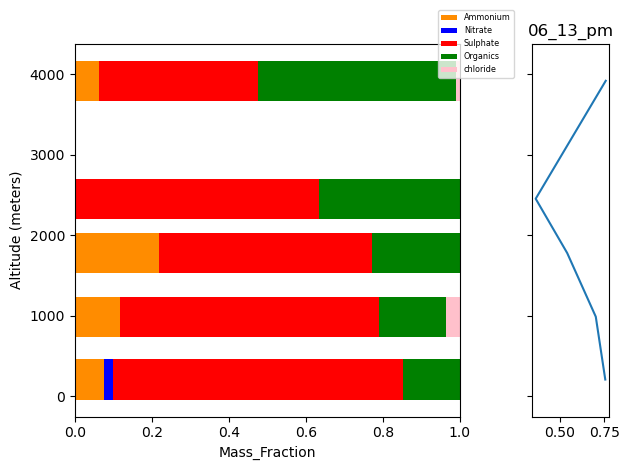

In [156]:
normal13 = (Day_13[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_13[' Org_Ave_IsoK_STP_ZIEMBA']+Day_13[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_13[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_13[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_13['AMS'] = normal13
Day_13 = Day_13.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_13[' NH4_Ave_IsoK_STP_ZIEMBA']/normal13
y2 = Day_13[' NO3_Ave_IsoK_STP_ZIEMBA']/normal13
y3 = Day_13[' SO4_Ave_IsoK_STP_ZIEMBA']/normal13
y4 = Day_13[' Org_Ave_IsoK_STP_ZIEMBA']/normal13
y5 = Day_13[' Chl_Ave_IsoK_STP_ZIEMBA']/normal13
y6 = Day_13[' mz44_Ave_IsoK_STP_ZIEMBA']/normal13
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_13[' GPS_Altitude_THORNHILL'], y1, height = 500, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_13[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 500, color = "blue", label = 'Nitrate')
ax[0].barh(Day_13[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 500, color = "red", label = 'Sulphate')
ax[0].barh(Day_13[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 500, color = "green", label = 'Organics')
#ax.barh(Day_13[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_13[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 500, color = "pink", label = 'chloride')
ax[1].plot(normal13, Day_13[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_13_pm')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [45]:
DAY13b = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220613_R0_L1_20230418T125955.ict')
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]
DAY13b_subset = DAY13b_subset.replace(-888888, 0)
DAY13b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
10015,2022-06-13 14:30:00,2022-06-13 14:30:01,32.210354,-65.054053,141.795,23.865,25.680,1001.400,25907.30,NaN,...,NaN,1.3,4.273,0.05226,0.1428,0.05063,2.009,0.45150,1.304,0.02516
10016,2022-06-13 14:30:01,2022-06-13 14:30:02,32.209934,-65.052981,141.725,23.835,25.495,1001.240,25840.90,NaN,...,NaN,1.3,4.273,0.05226,0.1428,0.05063,2.009,0.45150,1.304,0.02516
10017,2022-06-13 14:30:02,2022-06-13 14:30:03,32.209541,-65.051894,141.615,23.830,25.005,1001.510,26208.80,NaN,...,NaN,1.3,4.273,0.05226,0.1428,0.05063,2.009,0.45150,1.304,0.02516
10018,2022-06-13 14:30:03,2022-06-13 14:30:04,32.209173,-65.050793,141.460,23.855,24.620,1001.800,26363.80,NaN,...,NaN,1.3,4.273,0.05226,0.1428,0.05063,2.009,0.45150,1.304,0.02516
10019,2022-06-13 14:30:04,2022-06-13 14:30:05,32.208832,-65.049680,141.275,23.840,24.165,1001.640,26296.30,NaN,...,NaN,1.3,4.273,0.05226,0.1428,0.05063,2.009,0.45150,1.304,0.02516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10970,2022-06-13 14:45:55,2022-06-13 14:45:56,32.197220,-65.046274,4504.770,-0.020,20.900,594.015,5501.68,NaN,...,NaN,0.0,6.624,0.00000,0.0947,0.06287,0.000,0.02578,0.000,0.04529
10971,2022-06-13 14:45:56,2022-06-13 14:45:57,32.196954,-65.044914,4514.670,-0.115,20.665,593.295,5628.15,55.3,...,NaN,0.0,6.624,0.00000,0.0947,0.06287,0.000,0.02578,0.000,0.04529
10972,2022-06-13 14:45:57,2022-06-13 14:45:58,32.196726,-65.043543,4523.980,-0.215,20.940,592.580,5951.96,58.3,...,NaN,0.0,6.624,0.00000,0.0947,0.06287,0.000,0.02578,0.000,0.04529
10973,2022-06-13 14:45:58,2022-06-13 14:45:59,32.196539,-65.042160,4532.940,-0.295,20.800,591.910,6497.46,64.1,...,NaN,0.0,6.624,0.00000,0.0947,0.06287,0.000,0.02578,0.000,0.04529


In [46]:
Day_13b = DAY13b_subset.resample('3T', on='Time_Start').median()
Day_13b

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-13 14:30:00,2022-06-13 14:31:30.500,32.261024,-65.025552,268.1525,23.165,24.5900,986.6125,24361.40,NaN,85.20,...,NaN,1.3000,4.273,0.05226,0.1428,0.05063,2.0090,0.45150,1.3040,0.02516
2022-06-13 14:33:00,2022-06-13 14:34:30.500,32.223950,-65.022386,951.3200,20.435,24.0550,911.4325,17125.55,NaN,64.75,...,NaN,0.4999,3.074,0.05024,0.1553,0.07977,0.7349,1.50600,1.4790,0.03256
2022-06-13 14:36:00,2022-06-13 14:37:30.500,32.236506,-65.063410,1511.2850,18.425,23.3325,853.6050,12381.85,NaN,53.25,...,NaN,0.4999,3.074,0.05024,0.1553,0.07977,0.7349,1.50600,1.4790,0.03256
2022-06-13 14:39:00,2022-06-13 14:40:30.500,32.266759,-65.023708,2063.5550,15.140,22.6750,800.2225,10674.35,NaN,49.90,...,NaN,0.1434,5.587,0.00000,0.1524,0.19200,0.2041,0.58180,0.4285,0.06437
2022-06-13 14:42:00,2022-06-13 14:43:30.500,32.262356,-65.011735,3110.9300,8.005,21.7050,705.2025,6762.09,NaN,43.60,...,NaN,0.0000,6.624,0.00000,0.0947,0.06287,0.0000,0.02578,0.0000,0.04529
2022-06-13 14:45:00,2022-06-13 14:45:30.500,32.215231,-65.072795,4245.7200,1.050,20.9725,613.3125,5425.71,61.2,51.80,...,NaN,0.0000,6.624,0.00000,0.0947,0.06287,0.0000,0.02578,0.0000,0.04529


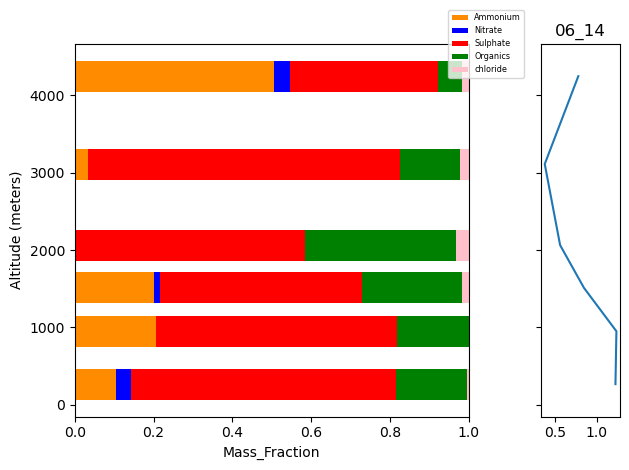

In [157]:
normal13b = (Day_13b[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_13b[' Org_Ave_IsoK_STP_ZIEMBA']+Day_13b[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_13b[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_13b[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_13b['AMS'] = normal13b
Day_13b = Day_13b.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_13b[' NH4_Ave_IsoK_STP_ZIEMBA']/normal13b
y2 = Day_13b[' NO3_Ave_IsoK_STP_ZIEMBA']/normal13b
y3 = Day_13b[' SO4_Ave_IsoK_STP_ZIEMBA']/normal13b
y4 = Day_13b[' Org_Ave_IsoK_STP_ZIEMBA']/normal13b
y5 = Day_13b[' Chl_Ave_IsoK_STP_ZIEMBA']/normal13b
y6 = Day_13b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal13b
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_13b[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_13b[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_13b[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_13b[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_13b[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_13b[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal13b, Day_13b[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_14')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [48]:
DAY14 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220614_R0_20230418T125957.ict')
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
    
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
DAY14_subset = DAY14_subset.replace(-888888, 0)
DAY14_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
9363,2022-06-14 16:05:00,2022-06-14 16:05:01,30.642555,-64.394685,117.000,25.355,26.940,1002.560,25354.80,NaN,...,NaN,0.5965,3.984,0.02847,0.08801,0.1162,0.7713,1.049,1.196,0.01318
9364,2022-06-14 16:05:01,2022-06-14 16:05:02,30.641725,-64.395343,117.085,25.370,27.415,1002.640,25260.60,NaN,...,NaN,0.5965,3.984,0.02847,0.08801,0.1162,0.7713,1.049,1.196,0.01318
9365,2022-06-14 16:05:02,2022-06-14 16:05:03,30.640923,-64.396042,117.190,25.370,27.710,1002.640,25567.60,NaN,...,NaN,0.5965,3.984,0.02847,0.08801,0.1162,0.7713,1.049,1.196,0.01318
9366,2022-06-14 16:05:03,2022-06-14 16:05:04,30.640148,-64.396780,117.295,25.345,27.795,1002.400,25147.60,NaN,...,NaN,0.5965,3.984,0.02847,0.08801,0.1162,0.7713,1.049,1.196,0.01318
9367,2022-06-14 16:05:04,2022-06-14 16:05:05,30.639403,-64.397555,117.380,25.375,26.650,1002.530,25094.50,NaN,...,NaN,0.5965,3.984,0.02847,0.08801,0.1162,0.7713,1.049,1.196,0.01318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10558,2022-06-14 16:24:55,2022-06-14 16:24:56,30.850057,-64.439182,8454.590,-26.050,12.405,353.175,1025.90,63.6,...,NaN,0.0000,6.334,0.00000,0.04481,0.0000,0.0000,0.000,0.000,0.03504
10559,2022-06-14 16:24:56,2022-06-14 16:24:57,30.851471,-64.439393,8461.000,-26.100,11.875,352.890,1030.86,64.3,...,NaN,0.0000,6.334,0.00000,0.04481,0.0000,0.0000,0.000,0.000,0.03504
10560,2022-06-14 16:24:57,2022-06-14 16:24:58,30.852885,-64.439595,8467.420,-26.180,11.015,352.460,1026.98,64.4,...,NaN,0.0000,6.334,0.00000,0.04481,0.0000,0.0000,0.000,0.000,0.03504
10561,2022-06-14 16:24:58,2022-06-14 16:24:59,30.854300,-64.439786,8473.860,-26.260,11.365,351.990,1033.11,65.3,...,NaN,0.0000,6.334,0.00000,0.04481,0.0000,0.0000,0.000,0.000,0.03504


In [49]:
Day_14 = DAY14_subset.resample('4.5T', on='Time_Start').median()
Day_14
#4.5

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U_ZIEMBA,Sodium_ZIEMBA_$1,Ammonium_ZIEMBA_$1,Potassium_ZIEMBA_$1,Magnesium_ZIEMBA_$1,Calcium_ZIEMBA_$1,Chloride_ZIEMBA_$1,Nitrate_ZIEMBA_$1,Sulfate_ZIEMBA_$1,Oxalate_ZIEMBA_$1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-14 16:03:00,2022-06-14 16:06:15.500,30.660967,-64.417503,481.8925,22.8475,26.3475,962.0850,20871.700,NaN,73.90,...,NaN,0.5965,3.984,0.02847,0.08801,0.11620,0.7713,1.0490,1.196,0.01318
2022-06-14 16:07:30,2022-06-14 16:09:45.500,30.663300,-64.409537,2257.8400,12.5275,23.5500,781.7050,13547.750,NaN,69.20,...,NaN,0.2000,3.942,0.00000,0.08911,0.11470,0.3263,0.5736,0.369,0.02012
2022-06-14 16:12:00,2022-06-14 16:14:15.500,30.665785,-64.376248,4337.0550,1.5850,21.1250,606.4275,4325.265,33.4,39.85,...,NaN,0.0000,4.632,0.00000,0.06463,0.08331,0.0000,0.0000,0.000,0.02380
2022-06-14 16:16:30,2022-06-14 16:18:45.500,30.683089,-64.387051,6046.7250,-9.1100,18.0900,488.3925,884.410,15.3,14.00,...,NaN,0.0000,7.025,0.00000,0.05189,0.00000,0.0000,0.0000,0.000,0.02094
2022-06-14 16:21:00,2022-06-14 16:23:00.500,30.701479,-64.419063,7820.9550,-20.8700,14.1050,385.6700,1065.895,45.9,37.45,...,NaN,0.0000,6.334,0.00000,0.04481,0.00000,0.0000,0.0000,0.000,0.03504


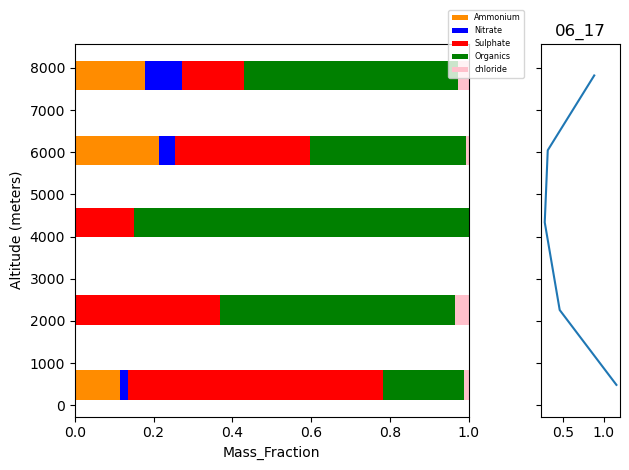

In [158]:
normal14 = (Day_14[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_14[' Org_Ave_IsoK_STP_ZIEMBA']+Day_14[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_14[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_14[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_14['AMS'] = normal14
Day_14 = Day_14.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_14[' NH4_Ave_IsoK_STP_ZIEMBA']/normal14
y2 = Day_14[' NO3_Ave_IsoK_STP_ZIEMBA']/normal14
y3 = Day_14[' SO4_Ave_IsoK_STP_ZIEMBA']/normal14
y4 = Day_14[' Org_Ave_IsoK_STP_ZIEMBA']/normal14
y5 = Day_14[' Chl_Ave_IsoK_STP_ZIEMBA']/normal14
y6 = Day_13b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal14
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_14[' GPS_Altitude_THORNHILL'], y1, height = 700, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_14[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 700, color = "blue", label = 'Nitrate')
ax[0].barh(Day_14[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 700, color = "red", label = 'Sulphate')
ax[0].barh(Day_14[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 700, color = "green", label = 'Organics')
#ax.barh(Day_14[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_14[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 700, color = "pink", label = 'chloride')
ax[1].plot(normal14, Day_14[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_17')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [51]:
DAY17 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220617_R0_20230418T125958.ict')
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
    
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]
DAY17_subset = DAY17_subset.replace(-888888, 0)
DAY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
10469,2022-06-17 16:20:00,2022-06-17 16:20:01,32.206574,-65.006772,134.100,21.905,24.820,995.935,17721.70,NaN,...,NaN,4.967,3.47,0.5797,0.34730,0.09795,8.731,1.159,0.8639,0.03271
10470,2022-06-17 16:20:01,2022-06-17 16:20:02,32.206131,-65.005761,133.795,21.935,24.625,996.415,17905.10,NaN,...,NaN,4.967,3.47,0.5797,0.34730,0.09795,8.731,1.159,0.8639,0.03271
10471,2022-06-17 16:20:02,2022-06-17 16:20:03,32.205725,-65.004728,133.485,21.940,23.680,996.745,17281.40,NaN,...,NaN,4.967,3.47,0.5797,0.34730,0.09795,8.731,1.159,0.8639,0.03271
10472,2022-06-17 16:20:03,2022-06-17 16:20:04,32.205357,-65.003676,133.170,21.930,23.155,996.505,16873.40,NaN,...,NaN,4.967,3.47,0.5797,0.34730,0.09795,8.731,1.159,0.8639,0.03271
10473,2022-06-17 16:20:04,2022-06-17 16:20:05,32.205027,-65.002606,132.825,21.950,22.535,996.455,16853.00,NaN,...,NaN,4.967,3.47,0.5797,0.34730,0.09795,8.731,1.159,0.8639,0.03271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12084,2022-06-17 16:46:55,2022-06-17 16:46:56,32.158601,-65.020304,7639.050,-17.335,17.625,393.290,1735.02,51.4,...,NaN,0.000,13.04,0.1192,0.09677,0.00000,0.000,0.000,0.0000,0.01744
12085,2022-06-17 16:46:56,2022-06-17 16:46:57,32.157293,-65.019563,7645.810,-17.400,17.690,392.950,1756.02,52.3,...,NaN,0.000,13.04,0.1192,0.09677,0.00000,0.000,0.000,0.0000,0.01744
12086,2022-06-17 16:46:57,2022-06-17 16:46:58,32.156002,-65.018778,7652.610,-17.450,17.490,392.615,1723.14,51.5,...,NaN,0.000,13.04,0.1192,0.09677,0.00000,0.000,0.000,0.0000,0.01744
12087,2022-06-17 16:46:58,2022-06-17 16:46:59,32.154729,-65.017953,7659.440,-17.510,16.705,392.220,1714.31,51.5,...,NaN,0.000,13.04,0.1192,0.09677,0.00000,0.000,0.000,0.0000,0.01744


In [52]:
Day_17 = DAY17_subset.resample('3.5T', on='Time_Start').median()
Day_17

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium_ZIEMBA,Ammonium_ZIEMBA,Potassium_ZIEMBA,Magnesium_ZIEMBA,Calcium_ZIEMBA,Chloride_ZIEMBA,Nitrate_ZIEMBA,Sulfate_ZIEMBA,Oxalate_ZIEMBA
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-17 16:20:00,2022-06-17 16:21:45.500,32.226819,-64.984810,292.180,20.5500,23.6450,978.6475,16616.65,NaN,67.35,...,NaN,4.39300,7.169,0.20290,0.39900,0.04178,7.102,1.5250,1.7200,0.01145
2022-06-17 16:23:30,2022-06-17 16:25:15.500,32.237606,-65.001570,1038.550,13.6775,22.8800,895.5075,15782.55,NaN,83.45,...,NaN,4.39300,7.169,0.20290,0.39900,0.04178,7.102,1.5250,1.7200,0.01145
2022-06-17 16:27:00,2022-06-17 16:28:45.500,32.232966,-65.020606,1207.995,12.5850,21.8000,877.3125,13976.15,NaN,84.50,...,NaN,2.86500,8.574,0.04471,0.25230,0.01447,4.209,1.4130,1.6040,0.01211
2022-06-17 16:30:30,2022-06-17 16:32:15.500,32.220101,-65.021711,1668.070,10.7375,20.9650,830.8875,12304.10,NaN,81.05,...,NaN,0.91790,9.516,0.00000,0.10650,0.00337,1.079,0.4087,0.6579,0.01875
2022-06-17 16:34:00,2022-06-17 16:35:45.500,32.206652,-65.021490,2394.265,11.7825,20.0250,761.9550,469.20,NaN,2.50,...,NaN,0.91790,9.516,0.00000,0.10650,0.00337,1.079,0.4087,0.6579,0.01875
2022-06-17 16:37:30,2022-06-17 16:39:15.500,32.197765,-65.001924,3963.950,5.7150,19.9800,630.1350,183.41,1.10,1.20,...,NaN,0.02024,15.560,0.00000,0.08481,0.00000,0.000,0.0000,0.0000,0.05337
2022-06-17 16:41:00,2022-06-17 16:42:45.500,32.195687,-64.988215,5830.740,-6.8350,18.6125,497.7975,1800.68,27.80,26.20,...,NaN,0.00000,21.780,0.40240,0.15910,0.00000,0.000,0.0000,0.0000,0.08408
2022-06-17 16:44:30,2022-06-17 16:45:45.500,32.201535,-64.973542,7187.450,-13.5750,16.5025,417.6300,1982.07,46.25,40.60,...,NaN,0.00000,21.780,0.40240,0.15910,0.00000,0.000,0.0000,0.0000,0.08408


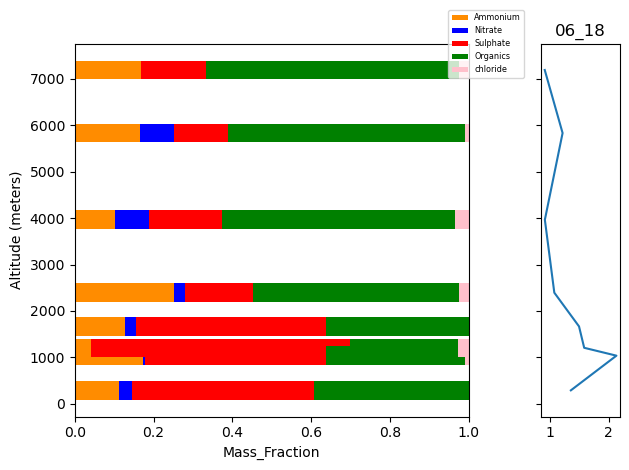

In [159]:
normal17 = (Day_17[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_17[' Org_Ave_IsoK_STP_ZIEMBA']+Day_17[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_17[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_17[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_17['AMS'] = normal17
Day_17 = Day_17.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_17[' NH4_Ave_IsoK_STP_ZIEMBA']/normal17
y2 = Day_17[' NO3_Ave_IsoK_STP_ZIEMBA']/normal17
y3 = Day_17[' SO4_Ave_IsoK_STP_ZIEMBA']/normal17
y4 = Day_17[' Org_Ave_IsoK_STP_ZIEMBA']/normal17
y5 = Day_17[' Chl_Ave_IsoK_STP_ZIEMBA']/normal17
y6 = Day_13b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal17
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_17[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_17[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_17[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_17[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_17[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_17[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal17, Day_17[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)
plt.title('06_18')

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [54]:
DAY18 = simple_read('C:/Users/taiwoajayi/Desktop/chemistry data/activate-mrg1_hu25_20220618_R0_20230418T125959.ict')
start_index = np.where(DAY18["Time_Start"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(DAY18["Time_Start"]==pd.to_datetime("2022-06-18 14:33:00"))
    
DAY18_subset = DAY18[start_index[0][0]:stop_index[0][0]]
DAY18_subset = DAY18_subset.replace(-888888, 0)
DAY18_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,...,ICP_U,Sodium.1,Ammonium.1,Potassium.1,Magnesium.1,Calcium.1,Chloride.1,Nitrate.1,Sulfate.1,Oxalate.1
7425,2022-06-18 14:09:00,2022-06-18 14:09:01,36.589500,-71.990803,110.135,25.275,25.570,987.185,17357.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7426,2022-06-18 14:09:01,2022-06-18 14:09:02,36.590250,-71.991516,110.155,25.270,25.640,987.250,17205.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7427,2022-06-18 14:09:02,2022-06-18 14:09:03,36.591026,-71.992186,109.965,25.290,26.285,987.330,16312.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7428,2022-06-18 14:09:03,2022-06-18 14:09:04,36.591824,-71.992808,109.535,25.335,26.090,987.780,16298.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7429,2022-06-18 14:09:04,2022-06-18 14:09:05,36.592643,-71.993383,109.055,25.360,25.950,988.055,17040.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,2022-06-18 14:32:55,2022-06-18 14:32:56,36.634224,-71.921855,7949.270,-24.560,12.980,370.935,191.59,10.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8861,2022-06-18 14:32:56,2022-06-18 14:32:57,36.634412,-71.923239,7954.260,-24.595,13.125,370.705,190.70,10.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8862,2022-06-18 14:32:57,2022-06-18 14:32:58,36.634602,-71.924625,7959.290,-24.645,13.955,370.415,189.01,10.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8863,2022-06-18 14:32:58,2022-06-18 14:32:59,36.634793,-71.926012,7964.380,-24.695,14.770,370.160,187.85,10.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
Day_18 = DAY18_subset.resample('3T', on='Time_Start').median()
Day_18

,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,IR_Surf_Temp_THORNHILL,Static_Pressure_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,...,ICP_U,Sodium.1,Ammonium.1,Potassium.1,Magnesium.1,Calcium.1,Chloride.1,Nitrate.1,Sulfate.1,Oxalate.1
Time_Start,,,,,,,,,,,,,,,,,,,,,
2022-06-18 14:09:00,2022-06-18 14:10:30.500,36.628169,-72.005715,256.3225,23.6875,26.4225,969.1900,16749.150,NaN,55.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-18 14:12:00,2022-06-18 14:13:30.500,36.592849,-71.991241,838.2500,20.5550,25.8150,906.1050,10962.550,NaN,40.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-18 14:15:00,2022-06-18 14:16:30.500,36.573565,-71.971294,1506.3450,15.8925,25.0950,838.1025,12007.150,NaN,55.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-18 14:18:00,2022-06-18 14:19:30.500,36.565698,-72.014449,2122.2500,12.7900,24.2925,779.1075,13209.850,NaN,66.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-18 14:21:00,2022-06-18 14:22:30.500,36.578988,-71.958124,3374.4900,5.4825,22.8100,670.3750,9271.755,63.3,66.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-18 14:24:00,2022-06-18 14:25:30.500,36.583957,-71.957733,4764.4850,-1.2950,20.8400,563.5750,665.420,6.6,6.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-18 14:27:00,2022-06-18 14:28:30.500,36.558550,-71.920819,6223.7650,-11.2575,18.6275,467.1800,327.435,6.2,5.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-18 14:30:00,2022-06-18 14:31:30.500,36.604245,-71.847836,7533.0200,-21.2800,15.3775,392.6150,192.235,7.5,6.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


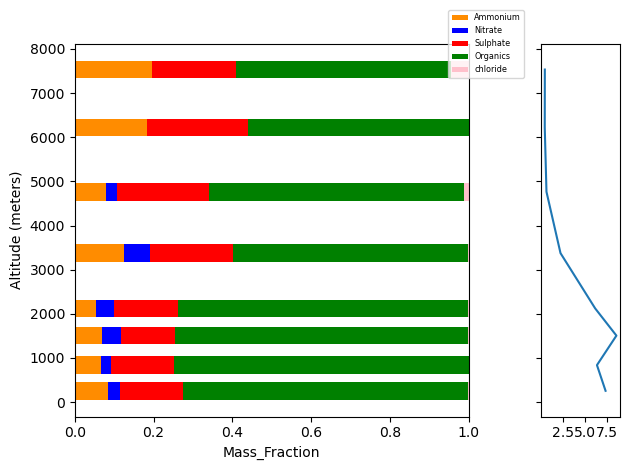

In [56]:
normal18 = (Day_18[' Chl_Ave_IsoK_STP_ZIEMBA']+Day_18[' Org_Ave_IsoK_STP_ZIEMBA']+Day_18[' SO4_Ave_IsoK_STP_ZIEMBA']+Day_18[' NO3_Ave_IsoK_STP_ZIEMBA']+Day_18[' NH4_Ave_IsoK_STP_ZIEMBA'])
Day_18['AMS'] = normal8
Day_18 = Day_18.sort_values(by= ' GPS_Altitude_THORNHILL')
y1 = Day_18[' NH4_Ave_IsoK_STP_ZIEMBA']/normal18
y2 = Day_18[' NO3_Ave_IsoK_STP_ZIEMBA']/normal18
y3 = Day_18[' SO4_Ave_IsoK_STP_ZIEMBA']/normal18
y4 = Day_18[' Org_Ave_IsoK_STP_ZIEMBA']/normal18
y5 = Day_18[' Chl_Ave_IsoK_STP_ZIEMBA']/normal18
y6 = Day_13b[' mz44_Ave_IsoK_STP_ZIEMBA']/normal18
fig,ax = plt.subplots(1,2, width_ratios=[20, 4], sharey = "all")
ax[0].barh(Day_18[' GPS_Altitude_THORNHILL'], y1, height = 400, color = "darkorange", label = 'Ammonium')
ax[0].barh(Day_18[' GPS_Altitude_THORNHILL'], y2, left = y1, height = 400, color = "blue", label = 'Nitrate')
ax[0].barh(Day_18[' GPS_Altitude_THORNHILL'], y3, left = y1+y2, height = 400, color = "red", label = 'Sulphate')
ax[0].barh(Day_18[' GPS_Altitude_THORNHILL'], y4, left = y1+y2+y3, height = 400, color = "green", label = 'Organics')
#ax.barh(Day_18[' GPS_Altitude_THORNHILL'], y6, left = y1+y2+y3, height = 400, color = "palegreen", label = 'mz44')
ax[0].barh(Day_18[' GPS_Altitude_THORNHILL'], y5, left = y1+y2+y3+y4, height = 400, color = "pink", label = 'chloride')
ax[1].plot(normal18, Day_18[' GPS_Altitude_THORNHILL'], label = 'Total_mass')

ax[0].set_ylabel('Altitude (meters)')
ax[0].set_xlabel('Mass_Fraction')
ax[0].set_xlim(0,1)

ax[0].legend(bbox_to_anchor=(1.15, 1), loc = 'right', fontsize='xx-small')
plt.tight_layout()

In [57]:
#ax.plot(Day_18[' GPS_Altitude_THORNHILL'], normal, height = 400, color = "darkorange", label = 'Total_mass')
normal
#Day_18[' GPS_Altitude_THORNHILL']


Time_Start
2022-06-02 18:36:00    1.9315
2022-06-02 18:39:00    1.4650
2022-06-02 18:42:00    1.3190
2022-06-02 18:45:00    1.0650
2022-06-02 18:48:00    0.4675
2022-06-02 18:51:00    0.5210
Freq: 3T, dtype: float64